In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


#공용함수

In [ ]:
# 수정금지: 타임스탬프용 함수
from datetime import datetime
def printt(*args,**kwargs):
  now = datetime.now()
  now_str = "{:02}:{:02}:{:02}".format(now.hour,now.minute,now.second)
  print(now_str, *args,**kwargs)
  return int(now.hour)*60*60+int(now.minute)*60+int(now.second)

#연관 패키지 설치 (다른작업 금지)

In [2]:
#TODO: 해당 블럭에 패키지 설치하세요.
!pip install attrdict
!pip install transformers
!pip install seqeval
!pip install fastprogress

     |████████████████████████████████| 2.6 MB 8.0 MB/s 
     |████████████████████████████████| 3.3 MB 55.1 MB/s 
     |████████████████████████████████| 636 kB 63.5 MB/s 
     |████████████████████████████████| 895 kB 46.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 43 kB 1.4 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=f2fee90ef29c4bff4d8e5f99890c336e23baceb0b396b57eb524971cec7ec5c4
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


# 파일로딩 (다른작업 금지)

In [ ]:
#TODO: 해당 블럭에 필요 파일 로딩 코드 넣으시오.


# 모델 학습

In [ ]:
# 수정금지: 타임스탬프
_model_build_start_time = printt("Model building: Start")
_model_build_start_time

08:34:48 Model building: Start


30888

In [ ]:
#TODO: 블럭에 모델 학습 - 빌딩 코드를 넣으세요. (시간측정 구간)





In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,404 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

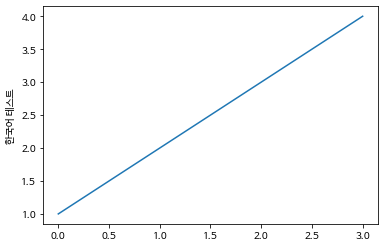

In [1]:
# 실행 전 런타임 다시시작
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.plot([1, 2, 3, 4])
plt.ylabel('한국어 테스트')
plt.show()

In [2]:
# task = 'classification'
task = 'sentiment'
train_file = 'train_cls.txt'
test_file = 'evaluation_cls.txt'
full_text = 'full_text.txt'


# train_file = train_s_cls.txt
# test_file = test_s_cls.txt

In [3]:
# initialize logging
import logging

logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
    datefmt="%m/%d/%Y %H:%M:%S",
    level=logging.INFO,
)

In [4]:
# make Input Example
class InputExample(object):
    """
    A single training/test example for simple sequence classification.
    """

    def __init__(self, guid, text_a, text_b, label):
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

    def __repr__(self):
        return str(self.to_json_string())

    def to_dict(self):
        """Serializes this instance to a Python dictionary."""
        output = copy.deepcopy(self.__dict__)
        return output

    def to_json_string(self):
        """Serializes this instance to a JSON string."""
        return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"
        
# make Input Feature
class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, attention_mask, token_type_ids, label):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.token_type_ids = token_type_ids
        self.label = label

    def __repr__(self):
        return str(self.to_json_string())

    def to_dict(self):
        """Serializes this instance to a Python dictionary."""
        output = copy.deepcopy(self.__dict__)
        return output

    def to_json_string(self):
        """Serializes this instance to a JSON string."""
        return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"

# make processor
class Processor(object):

    def __init__(self, args):
        self.args = args

    def get_labels(self):
        if self.args.task == 'classification':
        # return ['None', '상담원', '상담시스템', '고객서비스', '혜택', '할부금융상품', '커뮤니티서비스',
        #         '카드이용/결제', '카드상품', '청구입금', '심사/한도', '생활편의서비스', '상담/채널', '리스렌탈상품',
        #         '라이프서비스', '금융상품', '고객정보관리', '가맹점매출/승인', '가맹점대금', '가맹점계약', '삼성카드', '기타']
          return ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                  '13', '14', '15', '16']
        else:
          return ['0', '1']

    def _read_file(cls, input_file):
        """Reads a tab separated value file."""
        with open(input_file, "r", encoding="utf-8") as f:
            lines = []
            for line in f:
                lines.append(line.strip())
            return lines

    def _create_examples(self, lines, set_type):
        """Creates examples for the training and dev sets."""
        examples = []
        for (i, line) in enumerate(lines[0:]):
            line = line.split("\t")
            guid = "%s-%s" % (set_type, i)
            text_a = line[0]
            label = line[1]
            if i % 10000 == 0:
                logger.info(line)
            examples.append(InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
        return examples

    def get_examples(self, mode):
        """
        Args:
            mode: train, test
        """
        file_to_read = None
        if mode == "train":
            file_to_read = self.args.train_file
        elif mode == "test":
            file_to_read = self.args.test_file

        logger.info("LOOKING AT {}".format(os.path.join(self.args.data_dir, file_to_read)))
        return self._create_examples(
            self._read_file(os.path.join(self.args.data_dir, file_to_read)), mode
        )

In [16]:
# set config args for classification
from transformers import (
    ElectraConfig,
    ElectraTokenizer,
    ElectraForSequenceClassification,
    XLMRobertaForSequenceClassification,
    XLMRobertaTokenizer,
    XLMRobertaConfig
)
from attrdict import AttrDict
args = AttrDict(
    {
                 'data_dir': 'data/{}'.format(task),
                 'train_file': train_file,
                 'test_file': test_file,
                 'task': task,
                 'config': ElectraConfig,
                 'tokenizer': ElectraTokenizer,
                 'model': ElectraForSequenceClassification,
                #  'config': XLMRobertaConfig,
                #  'tokenizer': XLMRobertaTokenizer,
                #  'model': XLMRobertaForSequenceClassification,
                 'evaluate_test_during_training': True, 
                 'eval_all_checkpoints': True, 
                 'save_optimizer': False, 
                 'do_lower_case': False, 
                 'do_train': True, 
                 'do_eval': True, 
                 'max_seq_len': 128, 
                 'num_train_epochs': 20, 
                 'weight_decay': 0.0, 
                 'gradient_accumulation_steps': 1, 
                 'adam_epsilon': 1e-08, 
                 'warmup_proportion': 0, 
                 'max_steps': -1, 
                 'max_grad_norm': 1.0, 
                 'no_cuda': False, 
                 'model_type': 'koelectra-base-v3', 
                 'model_name_or_path': 'monologg/koelectra-base-v3-discriminator', 
                 'output_dir': '{}_checkpoints'.format(task), 
                 'seed': 42, 
                 'train_batch_size': 32, 
                 'eval_batch_size': 128, 
                 'logging_steps': 250, 
                 'save_steps': 250, 
                 'learning_rate': 5e-06
     }
)
if task == 'sentiment':
  args.logging_steps, args.save_steps = 63, 63
  args.max_seq_len = 64
  args.train_batch_size = 128

In [6]:
import torch

# set seed
torch.cuda.manual_seed_all(args.seed)

processor = Processor(args)
labels = processor.get_labels()


config = args.config.from_pretrained(
            args.model_name_or_path,
            num_labels=len(labels)
            # id2label={str(i): label for i, label in enumerate(labels)},
            # label2id={label: i for i, label in enumerate(labels)},
        )
tokenizer = args.tokenizer.from_pretrained(
    args.model_name_or_path,
    do_lower_case=args.do_lower_case
)
model = args.model.from_pretrained(
    args.model_name_or_path,
    config=config
)

08/11/2021 18:38:16 - INFO - filelock -   Lock 140337435074384 acquired on /root/.cache/huggingface/transformers/353ae9c3d9daa722551a585351b95934cefcf83155f6ff52a1975fa27863dfe0.9c57bd1e7b894b078a3a8ed91a498ca5fb48334c137fe2ec43e8079db1878f8c.lock


08/11/2021 18:38:16 - INFO - filelock -   Lock 140337435074384 released on /root/.cache/huggingface/transformers/353ae9c3d9daa722551a585351b95934cefcf83155f6ff52a1975fa27863dfe0.9c57bd1e7b894b078a3a8ed91a498ca5fb48334c137fe2ec43e8079db1878f8c.lock


08/11/2021 18:38:17 - INFO - filelock -   Lock 140340141201104 acquired on /root/.cache/huggingface/transformers/896eae0fbbb6c2981e5d4559f5d7fc0deb03e81c292abbe5c89b5bb1cf1294b3.541023ff50f833a9bab3e48e78ae1856cf6744bdb336c86e797eaf675b62b2b8.lock


08/11/2021 18:38:17 - INFO - filelock -   Lock 140340141201104 released on /root/.cache/huggingface/transformers/896eae0fbbb6c2981e5d4559f5d7fc0deb03e81c292abbe5c89b5bb1cf1294b3.541023ff50f833a9bab3e48e78ae1856cf6744bdb336c86e797eaf675b62b2b8.lock


08/11/2021 18:38:18 - INFO - filelock -   Lock 140337434827536 acquired on /root/.cache/huggingface/transformers/f2c12b0a8c12c754523b6ed45c1681b4495050720ade30bfe2345e5573d2e141.35f013c4fd3572cfdddbbdf6223ef162dd4fb536bf83007533f201addf3287b7.lock


08/11/2021 18:38:19 - INFO - filelock -   Lock 140337434827536 released on /root/.cache/huggingface/transformers/f2c12b0a8c12c754523b6ed45c1681b4495050720ade30bfe2345e5573d2e141.35f013c4fd3572cfdddbbdf6223ef162dd4fb536bf83007533f201addf3287b7.lock


08/11/2021 18:38:20 - INFO - filelock -   Lock 140337434725200 acquired on /root/.cache/huggingface/transformers/efc891feb2c6ce810e4350a7fb9d7f9f48d16b78cc24f95c34bd2d5d1d4bb9c4.20d7b162691634a30f634433042d1bfde6dea4760555a95e166bfa3a3b415682.lock


08/11/2021 18:38:29 - INFO - filelock -   Lock 140337434725200 released on /root/.cache/huggingface/transformers/efc891feb2c6ce810e4350a7fb9d7f9f48d16b78cc24f95c34bd2d5d1d4bb9c4.20d7b162691634a30f634433042d1bfde6dea4760555a95e166bfa3a3b415682.lock


Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

In [7]:
%cd /content/drive/MyDrive/Colab Notebooks
import os
from torch.utils.data import TensorDataset
logger = logging.getLogger(__name__)
print(__name__)
def load_and_cache_examples(args, tokenizer, mode):
    processor = Processor(args)
    output_mode = args.task
    # Load data features from cache or dataset file
    cached_features_file = os.path.join(
        args.data_dir,
        "cached_{}_{}_{}_{}".format(
            str(args.task), list(filter(None, args.model_name_or_path.split("/"))).pop(), str(args.max_seq_len), mode
        ),
    )
    if os.path.exists(cached_features_file):
        logger.info("Loading features from cached file %s", cached_features_file)
        features = torch.load(cached_features_file)
    else:
        logger.info("Creating features from dataset file at %s", args.data_dir)
        if mode == "train":
            examples = processor.get_examples("train")
        elif mode == "test":
            examples = processor.get_examples("test")
        else:
            raise ValueError("For mode, choose between train and test")
        features = seq_cls_convert_examples_to_features(
            args, examples, tokenizer, max_length=args.max_seq_len
        )
        logger.info("Saving features into cached file %s", cached_features_file)
        torch.save(features, cached_features_file)

    # Convert to Tensors and build dataset
    all_input_ids = torch.tensor([f.input_ids for f in features], dtype=torch.long)
    all_attention_mask = torch.tensor([f.attention_mask for f in features], dtype=torch.long)
    all_token_type_ids = torch.tensor([f.token_type_ids for f in features], dtype=torch.long)



    if output_mode == "classification" or 'sentiment':
        all_labels = torch.tensor([f.label for f in features], dtype=torch.long)


    # if output_mode == "classification":
    #     all_labels = torch.tensor([f.label for f in features], dtype=torch.long)
    # elif output_mode == "regression":
    #     all_labels = torch.tensor([f.label for f in features], dtype=torch.float)

    dataset = TensorDataset(all_input_ids, all_attention_mask, all_token_type_ids, all_labels)
    return dataset
def seq_cls_convert_examples_to_features(args, examples, tokenizer, max_length):
    processor = Processor(args)
    label_list = processor.get_labels()
    output_mode = args.task
    logger.info("Using label list {}".format(label_list))
    logger.info("Using output mode {}".format(output_mode))

    # labels = [label_from_example(example) for example in examples]
    labels = [int(example.label) for example in examples]

    batch_encoding = tokenizer.batch_encode_plus(
        [(example.text_a, example.text_b) for example in examples],
        max_length=max_length,
        padding="max_length",
        add_special_tokens=True,
        truncation=True,
    )

    features = []
    for i in range(len(examples)):
        inputs = {k: batch_encoding[k][i] for k in batch_encoding}
        if "token_type_ids" not in inputs:
            inputs["token_type_ids"] = [0] * len(inputs["input_ids"])  # For xlm-roberta

        feature = InputFeatures(**inputs, label=labels[i])
        features.append(feature)

    for i, example in enumerate(examples[:5]):
        logger.info("*** Example ***")
        logger.info("guid: {}".format(example.guid))
        logger.info("input_ids: {}".format(" ".join([str(x) for x in features[i].input_ids])))
        logger.info("attention_mask: {}".format(" ".join([str(x) for x in features[i].attention_mask])))
        logger.info("token_type_ids: {}".format(" ".join([str(x) for x in features[i].token_type_ids])))
        logger.info("label: {}".format(features[i].label))

    return features



/content/drive/MyDrive/Colab Notebooks
__main__


In [8]:
import argparse
import json
import logging
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from transformers import (
    AdamW,
    get_linear_schedule_with_warmup
)
from tqdm.auto import tqdm


def train(args,
          model,
          train_dataset,
          test_dataset=None):
    train_sampler = RandomSampler(train_dataset)
    train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=args.train_batch_size)
    full_text = pd.read_csv(os.path.join(args.data_dir, 'full_text.txt'), sep='\t')
    # full_text = pd.read_csv('train_n_full.txt', sep='\t')
    print(full_text)
    if args.max_steps > 0:
        t_total = args.max_steps
        print()
        print(t_total, len(train_dataloader), args.gradient_accumulation_steps)
        print()
        args.num_train_epochs = args.max_steps // (len(train_dataloader) // args.gradient_accumulation_steps) + 1
    else:
        t_total = len(train_dataloader) // args.gradient_accumulation_steps * args.num_train_epochs
        print('max steps: ' + str(t_total), 'length of train data: ' + str(len(train_dataloader)),
              args.gradient_accumulation_steps)
    # Prepare optimizer and schedule (linear warmup and decay)
    no_decay = ['bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
         'weight_decay': args.weight_decay},
        {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=args.learning_rate, eps=args.adam_epsilon)
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(t_total * args.warmup_proportion),
                                                num_training_steps=t_total)

    if os.path.isfile(os.path.join(args.model_name_or_path, "optimizer.pt")) and os.path.isfile(
            os.path.join(args.model_name_or_path, "scheduler.pt")
    ):
        # Load optimizer and scheduler states
        optimizer.load_state_dict(torch.load(os.path.join(args.model_name_or_path, "optimizer.pt")))
        scheduler.load_state_dict(torch.load(os.path.join(args.model_name_or_path, "scheduler.pt")))

    # Train!
    logger.info("***** Running training *****")
    logger.info("  Num examples = %d", len(train_dataset))
    logger.info("  Num Epochs = %d", args.num_train_epochs)
    logger.info("  Total train batch size = %d", args.train_batch_size)
    logger.info("  Gradient Accumulation steps = %d", args.gradient_accumulation_steps)
    logger.info("  Total optimization steps = %d", t_total)
    logger.info("  Logging steps = %d", args.logging_steps)
    logger.info("  Save steps = %d", args.save_steps)

    global_step = 0
    tr_loss = 0.0

    model.zero_grad()
    mb = master_bar(range(int(args.num_train_epochs)))
    for epoch in tqdm(mb):
        epoch_iterator = progress_bar(train_dataloader, parent=mb)

        for step, batch in enumerate(epoch_iterator):
            model.train()
            batch = tuple(t.to(args.device) for t in batch)
            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "labels": batch[3]
            }

            if args.model_type not in ["distilkobert", "xlm-roberta"]:
                inputs["token_type_ids"] = batch[2]  # Distilkobert, XLM-Roberta don't use segment_ids
            outputs = model(**inputs)
            loss = outputs[0]

            if args.gradient_accumulation_steps > 1:
                loss = loss / args.gradient_accumulation_steps

            loss.backward()
            tr_loss += loss.item()


            if (step + 1) % args.gradient_accumulation_steps == 0 or (
                    len(train_dataloader) <= args.gradient_accumulation_steps
                    and (step + 1) == len(train_dataloader)
            ):
                torch.nn.utils.clip_grad_norm_(model.parameters(), args.max_grad_norm)

                optimizer.step()
                scheduler.step()
                model.zero_grad()
                global_step += 1


                print("loss: " + str(tr_loss / global_step))


                if args.logging_steps > 0 and global_step % args.logging_steps == 0:
                    if args.evaluate_test_during_training:
                        evaluate(args, model, full_text, test_dataset, "test", global_step)

                if args.save_steps > 0 and global_step % args.save_steps == 0:
                    # Save model checkpoint
                    output_dir = os.path.join(args.output_dir, "checkpoint-{}".format(global_step))
                    if not os.path.exists(output_dir):
                        os.makedirs(output_dir)
                    model_to_save = (
                        model.module if hasattr(model, "module") else model
                    )
                    model_to_save.save_pretrained(output_dir)

                    torch.save(args, os.path.join(output_dir, "training_args.bin"))
                    logger.info("Saving model checkpoint to {}".format(output_dir))

                    if args.save_optimizer:
                        torch.save(optimizer.state_dict(), os.path.join(output_dir, "optimizer.pt"))
                        torch.save(scheduler.state_dict(), os.path.join(output_dir, "scheduler.pt"))
                        logger.info("Saving optimizer and scheduler states to {}".format(output_dir))
            if args.max_steps > 0 and global_step > args.max_steps:
                break

        mb.write("Epoch {} done".format(epoch + 1))

        if args.max_steps > 0 and global_step > args.max_steps:
            break

    return global_step, tr_loss / global_step, full_text

In [9]:
def evaluate(args, model, full_text, eval_dataset, mode, global_step=None):
    results = {}
    eval_sampler = SequentialSampler(eval_dataset)
    eval_dataloader = DataLoader(eval_dataset, sampler=eval_sampler, batch_size=args.eval_batch_size)

    # Eval!
    if global_step != None:
        logger.info("***** Running evaluation on {} dataset ({} step) *****".format(mode, global_step))
    else:
        logger.info("***** Running evaluation on {} dataset *****".format(mode))
    logger.info("  Num examples = {}".format(len(eval_dataset)))
    logger.info("  Eval Batch size = {}".format(args.eval_batch_size))
    eval_loss = 0.0
    # nb_eval_steps = 0
    preds = None
    out_label_ids = None
    out_input_ids = None

    for batch in progress_bar(eval_dataloader):
        model.eval()
        batch = tuple(t.to(args.device) for t in batch)

        with torch.no_grad():
            inputs = {
                "input_ids": batch[0],
                "attention_mask": batch[1],
                "labels": batch[3]
            }

            if args.model_type not in ["distilkobert", "xlm-roberta"]:
                inputs["token_type_ids"] = batch[2]  # Distilkobert, XLM-Roberta don't use segment_ids
            outputs = model(**inputs)
            tmp_eval_loss, logits = outputs[:2]

            eval_loss += tmp_eval_loss.mean().item()
        # nb_eval_steps += 1
        if preds is None:
            out_input_ids = inputs['input_ids'].detach().cpu().numpy()
            preds = logits.detach().cpu().numpy()
            out_label_ids = inputs["labels"].detach().cpu().numpy()
        else:
            out_input_ids = np.append(out_input_ids, inputs['input_ids'].detach().cpu().numpy(), axis=0)
            preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)
            out_label_ids = np.append(out_label_ids, inputs["labels"].detach().cpu().numpy(), axis=0)

        # 내가 수정한 부분

    tokenizer = args.tokenizer.from_pretrained(
        args.model_name_or_path,
        do_lower_case=args.do_lower_case
    )
    # label_dict = {'칭찬': 0, '중립': 0.5, '불만': 1}
    if args.task == 'classification':
      label_dict = {'중립': 0, '상담원': 1, '상담시스템': 2, '혜택': 3, '할부금융상품': 4,
                  '카드상품': 5, '청구입금': 6, '심사/한도': 7, '생활편의서비스': 8,
                  '상담/채널': 9, '리스렌탈상품': 10, '라이프서비스': 11, '금융상품': 12,
                  '고객정보관리': 13, '가맹점매출/승인': 14, '삼성카드': 15, '기타': 16}
    else:
      label_dict = {'칭찬': 0, '불만': 1}
    label_dict = dict((v, k) for k, v in label_dict.items())
    df_review = []
    # temp_review = []
    df_label = np.vectorize(label_dict.get)(out_label_ids)
    df_prediction = np.vectorize(label_dict.get(np.argmax(preds)))
    for i in range(len(out_input_ids)):
        review_list = list(out_input_ids[i])


        # temp_review.append(str(x) for x in out_input_ids[i])


        while 0 in review_list:
            review_list.remove(0)
        del review_list[0]
        del review_list[-1]
        df_review.append(tokenizer.decode(review_list))
        # print(review_list, label_dict[out_label_ids[i] - 1], label_dict[np.argmax(preds[i]) - 1])
    df_data = {'Review': df_review, 'Label': df_label, 'Prediction': df_prediction}
    df = pd.DataFrame(df_data)

    df_train_data = {'Review': full_text['Review'], 'Label': full_text['Label']}
    df_from_train = pd.DataFrame(df_train_data)
    # Dodged Bar Chart (with same X coordinates side by side)

    bar_width = 0.35
    alpha = 0.5
    label_lst = list(label_dict.values())
    index = np.arange(len(label_lst))
    count_list, cnt_pred, cnt_label = [0 for _ in range(len(label_dict))], \
                                    [0 for _ in range(len(label_dict))], [0 for _ in range(len(label_dict))]
    count_labels = df_from_train.groupby('Label', as_index=False).Review.count()
    acc_labels = df[df['Label'] == df['Prediction']].groupby('Label').Review.count()
    viable_label = list(count_labels['Label'])
    for i in range(len(viable_label)):
        count_list[viable_label[i]] = count_labels['Review'][i]
    for validation in range(len(out_label_ids)):
        if out_label_ids[validation] == np.argmax(preds, axis=1)[validation]:
            cnt_pred[out_label_ids[validation]] += 100
        cnt_label[out_label_ids[validation]] += 1
    for i in range(len(cnt_label)):
        if cnt_label[i] == 0:
            cnt_label[i] = 1
    acc_tot = np.divide(cnt_pred, cnt_label)
    acc_tot[np.isnan(acc_tot)] = 0
    # print(count_list)
    # print(acc_tot)
    plt.figure(figsize=(15, 8))
    plt.subplot(2, 1, 1)
    plt.title('Bar Chart of Labels Count and Accuracy', fontsize=15)
    clrs = ['r' if (x < 15) else 'b' for x in count_list]
    p1 = plt.bar(index, count_list,
                 bar_width,
                 color=clrs,
                 alpha=alpha,
                 label='Count')
    plt.ylabel('Count of Labels', fontsize=12)
    plt.xticks([], [])
    # plt.legend((p1[0],), ('Count',), fontsize=10)
    plt.subplot(2, 1, 2)
    p2 = plt.bar(index + bar_width, acc_tot,
                 bar_width,
                 color=clrs,
                 alpha=alpha,
                 label='Accuracy')
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())
    plt.ylabel('Accuracy by Labels', fontsize=12)
    plt.xlabel('Label', fontsize=12)
    plt.xticks(index, label_lst, fontsize=10, rotation=45)
    # plt.legend((p2[0],), ('Accuracy',), fontsize=10)
    plt.show()
        # for i in range(len(out_label_ids)):
        #     print(tokenizer.decode(out_ids[i]), out_label_ids[i], preds[i])
        # print(type(out_label_ids), type(preds))
        # print(out_label_ids, preds)
        #

    # eval_loss = eval_loss / nb_eval_steps
    # if output_modes[args.task] == "classification":
    preds_original = preds.copy()
    preds = np.argmax(preds, axis=1)
    # elif output_modes[args.task] == "regression":
    #     preds = np.squeeze(preds)
    result = compute_metrics(out_label_ids, preds)

    # 틀린 항목 정리
    check_right = out_label_ids == preds
    df = pd.DataFrame(columns=['Review', 'Label', 'Prediction', 'Softmax'])
    for check_result in range(len(check_right)):
        if not check_right[check_result]:
            review_list = list(out_input_ids[check_result])
            while 0 in review_list:
                review_list.remove(0)
            del review_list[0]
            del review_list[-1]
            df = df.append({'Review': tokenizer.decode(review_list), 
                           'Label': label_dict[out_label_ids[check_result]], 
                           'Prediction': label_dict[preds[check_result]],
                           'Softmax': preds_original[check_result]},
                           ignore_index=True
                           )
    
    print(df.head())
    df.to_csv(r'analysis_ckpt_{}_{}.csv'.format(args.task, global_step), header=None, index=None, sep='\t', mode='a')
            # print(tokenizer.decode(review_list), 'Label: ' + str(label_dict[out_label_ids[check_result]]) + ' Prediction: ' + str(
            #     label_dict[preds[check_result]]))


    # numpy_data = np.array(out_label_ids, preds)
    # df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])
    print(result)
    results.update(result)
    output_dir = os.path.join(args.output_dir, mode)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_eval_file = os.path.join(output_dir,
                                    "{}-{}.txt".format(mode, global_step) if global_step else "{}.txt".format(mode))
    with open(output_eval_file, "w") as f_w:
        logger.info("***** Eval results on {} dataset *****".format(mode))
        for key in sorted(results.keys()):
            logger.info("  {} = {}".format(key, str(results[key])))
            f_w.write("  {} = {}\n".format(key, str(results[key])))

    return results

def compute_metrics(labels, preds):
    assert len(preds) == len(labels)
    return {"acc": (labels == preds).mean()}

In [10]:
train_dataset = load_and_cache_examples(args, tokenizer, mode="train")
test_dataset = load_and_cache_examples(args, tokenizer, mode="test")

08/11/2021 18:38:33 - INFO - __main__ -   Creating features from dataset file at data/sentiment
08/11/2021 18:38:33 - INFO - __main__ -   LOOKING AT data/sentiment/train_cls.txt
08/11/2021 18:38:33 - INFO - __main__ -   ['스마트 앱으로  자동 넘어가는 것 불편함  문자 이용하려 해도', '1']
08/11/2021 18:38:33 - INFO - __main__ -   Using label list ['0', '1']
08/11/2021 18:38:33 - INFO - __main__ -   Using output mode sentiment
08/11/2021 18:38:35 - INFO - __main__ -   *** Example ***
08/11/2021 18:38:35 - INFO - __main__ -   guid: train-0
08/11/2021 18:38:35 - INFO - __main__ -   input_ids: 2 6777 3098 10749 6559 9764 4034 2048 7876 4418 8314 6361 4279 4228 6571 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/11/2021 18:38:35 - INFO - __main__ -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
08/11/2021 18:38:35 - INFO - __main__ -   token_type_ids: 0 0 0 0 0 0 0 

08/11/2021 18:42:37 - INFO - __main__ -   ***** Running training *****
08/11/2021 18:42:37 - INFO - __main__ -     Num examples = 7943
08/11/2021 18:42:37 - INFO - __main__ -     Num Epochs = 20
08/11/2021 18:42:37 - INFO - __main__ -     Total train batch size = 128
08/11/2021 18:42:37 - INFO - __main__ -     Gradient Accumulation steps = 1
08/11/2021 18:42:37 - INFO - __main__ -     Total optimization steps = 1260
08/11/2021 18:42:37 - INFO - __main__ -     Logging steps = 64
08/11/2021 18:42:37 - INFO - __main__ -     Save steps = 64


                                                 Review  Label
0                    스마트 앱으로  자동 넘어가는 것 불편함  문자 이용하려 해도      1
1     상담 시에 고객의 의문사항을 충분히 들어 주었으면 함  상담사 말소리가 너무 빨라서...      1
2                                     카톡 상담이 가능했으면 좋겠어요      1
3     연회비가 있다는 것에 아쉬움이 있습니다 카드 사용의 활성화를 위해 어느 정도 사용 ...      1
4                                       이해를 못 하시는 거 같아요      1
...                                                 ...    ...
9925                                  무이자계월수을좀더길게주면좋겠어요      1
9926                                        너무 친절해요 좋아요      0
9927       Ars가 너무 이상하다  관리자가 직접 한번 눌려보시길 바란다   정말 최악이다      1
9928                  무이자로 구매할 수 있는 명확한 기준을 알려주시면 좋겠습니다      1
9929                          상담원 연결 시  기다리는 시간이  오래 걸림      1

[9930 rows x 2 columns]
max steps: 1260 length of train data: 63 1


loss: 0.6197990775108337
loss: 0.6173512935638428
loss: 0.6166170835494995
loss: 0.6162578761577606
loss: 0.6163336396217346
loss: 0.6134727696577708
loss: 0.6101329837526593
loss: 0.6090802177786827
loss: 0.6049968931410048
loss: 0.6030846655368804
loss: 0.6002845601602034
loss: 0.599417378505071
loss: 0.5958229257510259
loss: 0.5939944556781224
loss: 0.5917263309160868
loss: 0.5890783965587616
loss: 0.5872086146298576
loss: 0.584931386841668
loss: 0.5828601184644198
loss: 0.5803233236074448
loss: 0.5785502876554217
loss: 0.5765217461369254
loss: 0.5751076340675354
loss: 0.5727502380808195
loss: 0.5697389626502991
loss: 0.5679868964048532
loss: 0.5659156066400034
loss: 0.5635926255158016
loss: 0.5613375727472634
loss: 0.5585037032763164
loss: 0.5555313739084429
loss: 0.5529230525717139
loss: 0.5510238120050142
loss: 0.5484018983209834
loss: 0.5459228098392487
loss: 0.5436685863468382
loss: 0.5414708369487041
loss: 0.5392807910316869
loss: 0.5369452291574234
loss: 0.5354099124670029
lo

08/11/2021 18:43:55 - INFO - __main__ -   ***** Running evaluation on test dataset (64 step) *****
08/11/2021 18:43:55 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:43:55 - INFO - __main__ -     Eval Batch size = 128


loss: 0.479767007753253


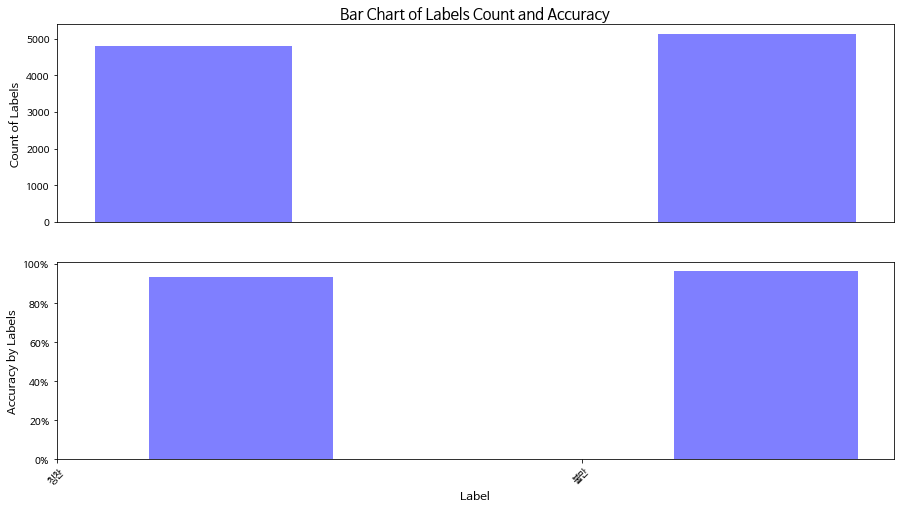

08/11/2021 18:44:05 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:44:05 - INFO - __main__ -     acc = 0.9501761449421238


                                              Review  ...                    Softmax
0                                    진짜 이번에 상담 최악입니다  ...  [0.41663927, -0.62934583]
1          상담사 OOO는 아주 불친절하고 성의 없었습니다 그 외에는 너무 만족합니다  ...     [0.3508738, -0.635171]
2                                    연결이 비교적 빠른 편입니다  ...  [-0.33309937, 0.31298503]
3                                            너무 불친절함  ...  [0.16791996, -0.37441677]
4  타 회사에 불편 접수를 했는데 상담분이 엄청 미안해하시고 신속하게 처리 도와줘서 감...  ...  [-0.26458818, 0.19362539]

[5 rows x 4 columns]
{'acc': 0.9501761449421238}


08/11/2021 18:44:07 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-64


loss: 0.47764789095291726
loss: 0.47525803293242597
loss: 0.47320434540065365
loss: 0.47079741472707076
loss: 0.46862071147863416
loss: 0.46635100884096964
loss: 0.46464849231948313
loss: 0.4624409013324314
loss: 0.46023423418606796
loss: 0.4585820239137959
loss: 0.45621532360712685
loss: 0.4538823601446654
loss: 0.45183438140076476
loss: 0.449774301969088
loss: 0.4476971596102171
loss: 0.44536517672240733
loss: 0.4435896571771598
loss: 0.4413982786056472
loss: 0.43952583297189457
loss: 0.4371194128124487
loss: 0.43491421885350173
loss: 0.43249733728724854
loss: 0.43022583425045013
loss: 0.42832253382287244
loss: 0.42616572105482725
loss: 0.4240040731098917
loss: 0.42174060888342807
loss: 0.4199381758985312
loss: 0.4176445391870314
loss: 0.4158364350491382
loss: 0.414172730634087
loss: 0.4122524190073212
loss: 0.4108356609172428
loss: 0.40874069929122925
loss: 0.4067260833701702
loss: 0.40459119752049444
loss: 0.4026342431212416
loss: 0.4006737830007778
loss: 0.3985668562569665
loss: 0

08/11/2021 18:45:25 - INFO - __main__ -   ***** Running evaluation on test dataset (128 step) *****
08/11/2021 18:45:25 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:45:25 - INFO - __main__ -     Eval Batch size = 128


loss: 0.3554842161247507


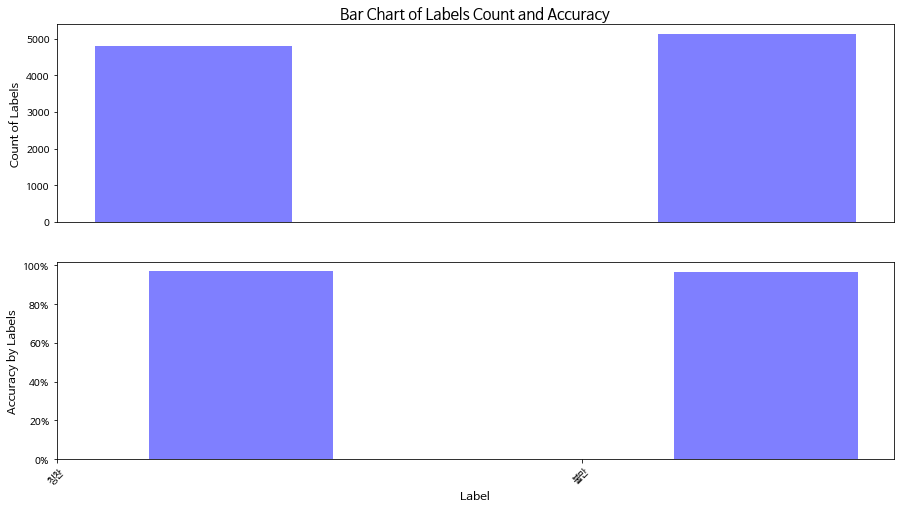

08/11/2021 18:45:35 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:45:35 - INFO - __main__ -     acc = 0.9693004529441369


                                              Review  ...                     Softmax
0                                    진짜 이번에 상담 최악입니다  ...    [0.80640984, -1.0161736]
1          상담사 OOO는 아주 불친절하고 성의 없었습니다 그 외에는 너무 만족합니다  ...      [1.0503508, -1.245868]
2                                           혜택이 많아으면  ...  [0.030154796, -0.23336297]
3                                   포인트가 너무 없다 인상적이다  ...     [1.0545254, -1.2459787]
4  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...     [-0.5706845, 0.4451114]

[5 rows x 4 columns]
{'acc': 0.9693004529441369}


08/11/2021 18:45:37 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-128


loss: 0.35392530458842136
loss: 0.352452568595226
loss: 0.35083115555857886
loss: 0.34925866702740843
loss: 0.34760111749620365
loss: 0.3458721971333916
loss: 0.34440692652154853
loss: 0.3428333378670847
loss: 0.34150540154345715
loss: 0.3403695792607639
loss: 0.338901390167449
loss: 0.33750226487006457
loss: 0.33601056007628743
loss: 0.3344632195649852
loss: 0.33352137440359675
loss: 0.33215271345236236
loss: 0.3309387600113606
loss: 0.3298654838477912
loss: 0.3285850349839042
loss: 0.32722907790259737
loss: 0.32582393008590543
loss: 0.32453640739123024
loss: 0.3232556525247776
loss: 0.321781328389127
loss: 0.32046863188346225
loss: 0.3192049724037771
loss: 0.31784581719867644
loss: 0.316481949427189
loss: 0.31513613372281857
loss: 0.3139541477813751
loss: 0.31286152002384077
loss: 0.3116347671952099
loss: 0.3103771496633565
loss: 0.30924056507187125
loss: 0.3079216610068924
loss: 0.306770530006871
loss: 0.30575140565633774
loss: 0.30463583516069204
loss: 0.30355634750006444
loss: 0.3

08/11/2021 18:46:55 - INFO - __main__ -   ***** Running evaluation on test dataset (192 step) *****
08/11/2021 18:46:55 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:46:55 - INFO - __main__ -     Eval Batch size = 128


loss: 0.2780727873323485


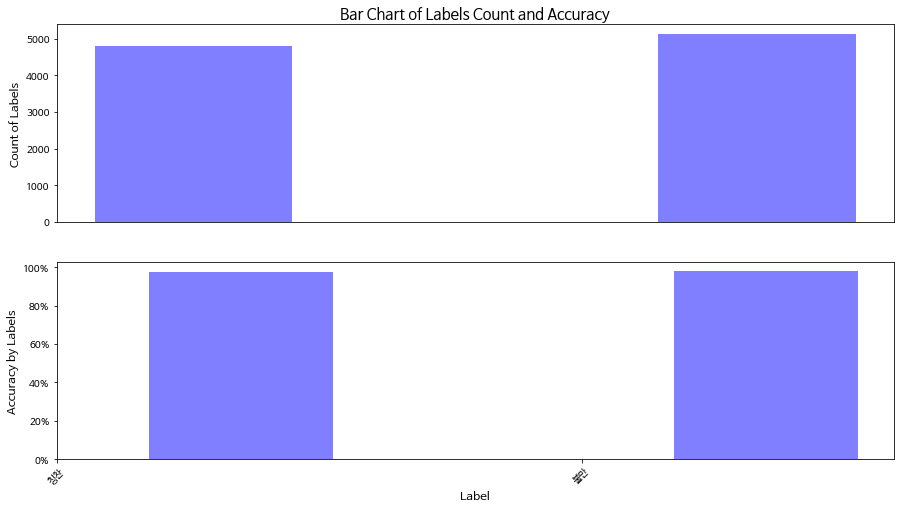

08/11/2021 18:47:04 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:47:04 - INFO - __main__ -     acc = 0.9778560644187216


                                              Review  ...                    Softmax
0          상담사 OOO는 아주 불친절하고 성의 없었습니다 그 외에는 너무 만족합니다  ...  [0.01801731, -0.31900477]
1                                   포인트가 너무 없다 인상적이다  ...   [0.13799758, -0.4277323]
2  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...     [-1.2157907, 1.271382]
3                               대기시간만 짧아진다면 아주 만족합니다  ...    [1.4911758, -1.5892112]
4                                         상담까지 [UNK]  ...   [0.86316127, -1.0318949]

[5 rows x 4 columns]
{'acc': 0.9778560644187216}


08/11/2021 18:47:06 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-192


loss: 0.27699863706073613
loss: 0.2760651589361663
loss: 0.2750911079538174
loss: 0.27412166993836967
loss: 0.2731751959562907
loss: 0.2722978142626358
loss: 0.27127731733735483
loss: 0.27023205418139695
loss: 0.2694443420539448
loss: 0.2684679316117032
loss: 0.26757134420090706
loss: 0.2668822466523624
loss: 0.26615815649672253
loss: 0.265151730801874
loss: 0.2643028956248564
loss: 0.26348494107906634
loss: 0.2626201158576605
loss: 0.261957010520356
loss: 0.2611432895417462
loss: 0.2602869003378558
loss: 0.25954250039908805
loss: 0.25862665025291043
loss: 0.2576885185615961
loss: 0.25679360471527884
loss: 0.25602262110067403
loss: 0.2552785863501763
loss: 0.2545537187220299
loss: 0.253670685721392
loss: 0.2530235848579202
loss: 0.25218479014798867
loss: 0.25133234020239037
loss: 0.2506794400479911
loss: 0.24985715596212282
loss: 0.24935332667577056
loss: 0.24858286282630218
loss: 0.247853188317988
loss: 0.24701685006181226
loss: 0.24616764325486576
loss: 0.24538663911806557
loss: 0.24

08/11/2021 18:48:24 - INFO - __main__ -   ***** Running evaluation on test dataset (256 step) *****
08/11/2021 18:48:24 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:48:24 - INFO - __main__ -     Eval Batch size = 128


loss: 0.23068838643666822


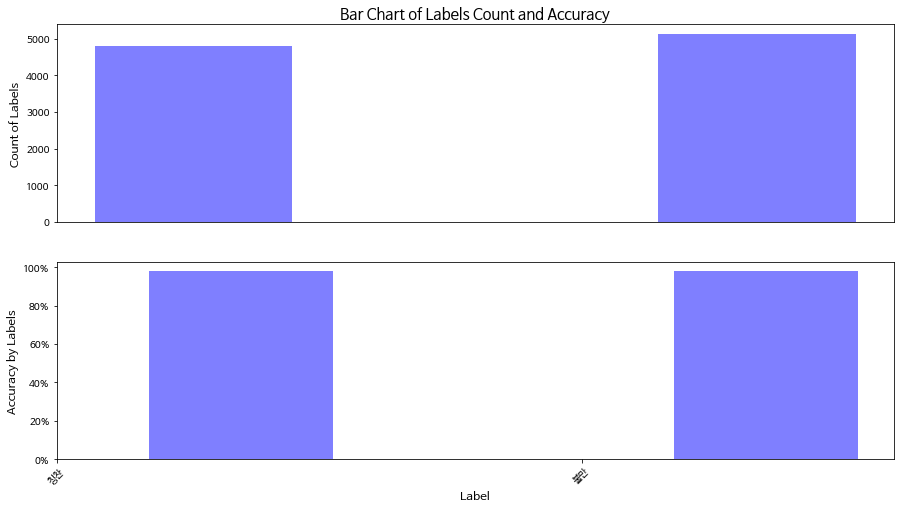

08/11/2021 18:48:34 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:48:34 - INFO - __main__ -     acc = 0.9798691494715652


                                              Review  ...                     Softmax
0          상담사 OOO는 아주 불친절하고 성의 없었습니다 그 외에는 너무 만족합니다  ...    [0.45908445, -0.7808404]
1                                   포인트가 너무 없다 인상적이다  ...  [-0.07819014, -0.20247446]
2  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...      [-1.185722, 1.1881998]
3                               대기시간만 짧아진다면 아주 만족합니다  ...     [1.7402395, -1.8155565]
4                                         상담까지 [UNK]  ...     [1.0605774, -1.2355615]

[5 rows x 4 columns]
{'acc': 0.9798691494715652}


08/11/2021 18:48:36 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-256


loss: 0.23006839628407463
loss: 0.22954961237346017
loss: 0.22885216256193672
loss: 0.22812888964724082
loss: 0.22756671678574605
loss: 0.22714593129246743
loss: 0.22664323566701022
loss: 0.22601188003847544
loss: 0.22541678701088114
loss: 0.22473556273861936
loss: 0.22405836171704285
loss: 0.22343335635682096
loss: 0.22285655452471684
loss: 0.22221407174236243
loss: 0.2215993469134248
loss: 0.22095415790510528
loss: 0.22042654381021037
loss: 0.21985391152166103
loss: 0.2192898914488879
loss: 0.2187359482049942
loss: 0.21811675184846785
loss: 0.21762946691605256
loss: 0.2170008364464006
loss: 0.21653116487764887
loss: 0.21596268960854761
loss: 0.21542184227905797
loss: 0.21494287493319478
loss: 0.21440073513281596
loss: 0.2138042077683566
loss: 0.21351049517418122
loss: 0.21291032036318597
loss: 0.21243906768763232
loss: 0.21194597343981886
loss: 0.21135149667489117
loss: 0.21087779790879935
loss: 0.21029271324458595
loss: 0.20986340720041213
loss: 0.2093930425515183
loss: 0.2088470587

08/11/2021 18:49:54 - INFO - __main__ -   ***** Running evaluation on test dataset (320 step) *****
08/11/2021 18:49:54 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:49:54 - INFO - __main__ -     Eval Batch size = 128


loss: 0.19670939007773997


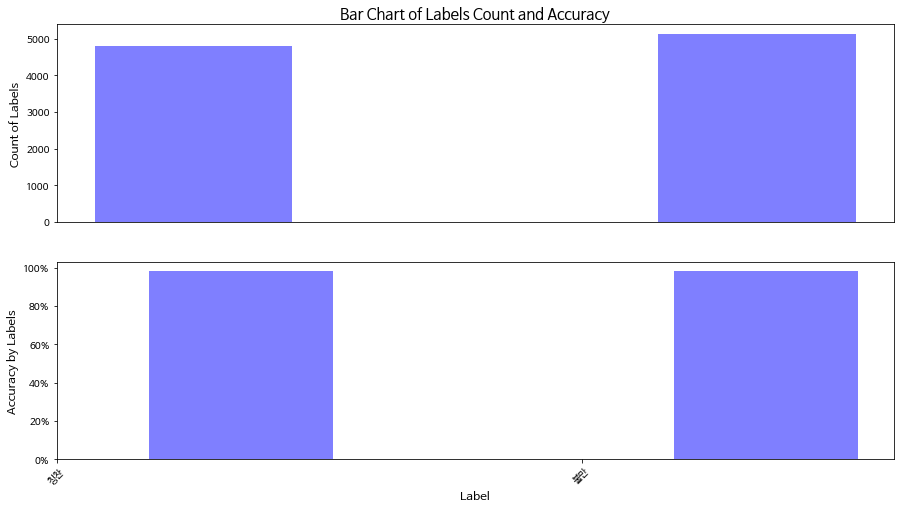

08/11/2021 18:50:04 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:50:04 - INFO - __main__ -     acc = 0.9813789632611978


                                              Review  ...                    Softmax
0             친절하게 대해주시면 다소 불평불만이 있다가도 풀어집니다 대부분의 사람  ...  [0.18338956, -0.40758598]
1  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...    [-1.1542934, 1.1520914]
2                               대기시간만 짧아진다면 아주 만족합니다  ...    [1.9338259, -1.9874171]
3                                         상담까지 [UNK]  ...    [1.2659945, -1.4046931]
4                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...    [1.7815975, -1.8640887]

[5 rows x 4 columns]
{'acc': 0.9813789632611978}


08/11/2021 18:50:06 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-320


loss: 0.19632287792327618
loss: 0.1959261764419375
loss: 0.19542808726937408
loss: 0.19500314289083084
loss: 0.19449619417007152
loss: 0.19399690833742633
loss: 0.19359625702786518
loss: 0.1931089265612749
loss: 0.19261235128352164
loss: 0.19212945701385087
loss: 0.19165995536411456
loss: 0.19128756435498237
loss: 0.1908807645722463
loss: 0.1907063798845082
loss: 0.19022872264483082
loss: 0.18978292001633063
loss: 0.18946375079917271
loss: 0.18901676693435251
loss: 0.1885958489327304
loss: 0.1882473695804091
loss: 0.18778787271455585
loss: 0.18733542382020002
loss: 0.18705697620488465
loss: 0.1865972884995646
loss: 0.18615558098839677
loss: 0.18569981643251773
loss: 0.18523952090087473
loss: 0.18480638198383237
loss: 0.18437218019221097
loss: 0.18394510731101035
loss: 0.18349623897158013
loss: 0.18312141807771035
loss: 0.1826894824517094
loss: 0.18225105910293632
loss: 0.18181164471931022
loss: 0.18148489176620092
loss: 0.18107676539956188
loss: 0.18071162670996435
loss: 0.180372655884

08/11/2021 18:51:24 - INFO - __main__ -   ***** Running evaluation on test dataset (384 step) *****
08/11/2021 18:51:24 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:51:24 - INFO - __main__ -     Eval Batch size = 128


loss: 0.17184658769110683


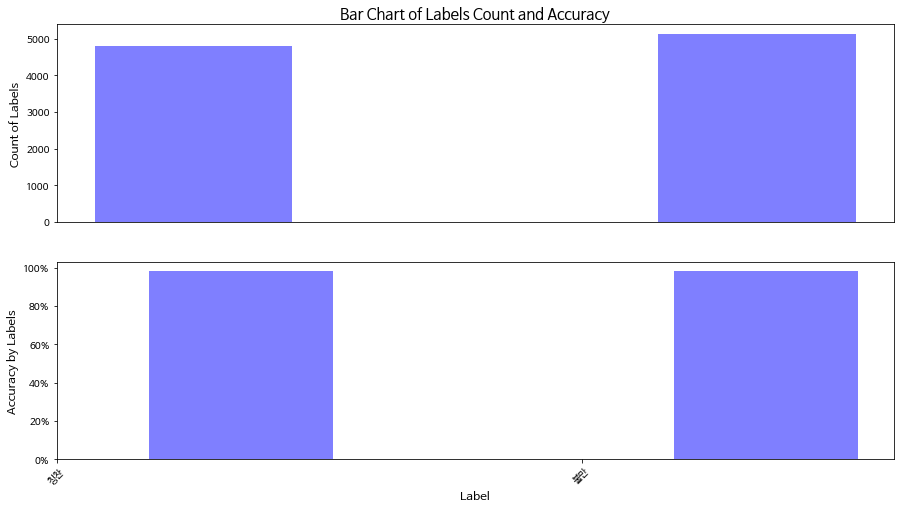

08/11/2021 18:51:34 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:51:34 - INFO - __main__ -     acc = 0.9823855057876195


                                              Review  ...                  Softmax
0  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...  [-1.4033307, 1.4351559]
1                               대기시간만 짧아진다면 아주 만족합니다  ...  [2.0844579, -2.1301348]
2                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...  [1.9157304, -1.9953158]
3                                     대기시간 이 조금 더 짧게  ...  [1.4084601, -1.5780127]
4  타 카드사는 27일 결제일도 있고 080수신자 번호도 있고 전화를 하자마자 받는 상...  ...   [-1.083723, 1.0474334]

[5 rows x 4 columns]
{'acc': 0.9823855057876195}


08/11/2021 18:51:36 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-384


loss: 0.17159668957548482
loss: 0.17128651031809303
loss: 0.17093075813306857
loss: 0.17054873408711294
loss: 0.1701802874754894
loss: 0.1699547907910668
loss: 0.1695901229120124
loss: 0.16928774518512038
loss: 0.1689968400613497
loss: 0.1687012838984504
loss: 0.16844483074508135
loss: 0.1681020538877658
loss: 0.16774218036823668
loss: 0.16748531214218942
loss: 0.167121390482985
loss: 0.16679588357917965
loss: 0.16643748512756348
loss: 0.16608283942129778
loss: 0.16579987646702204
loss: 0.1654425654929168
loss: 0.16509358667665058
loss: 0.16482785248697684
loss: 0.1645184793676586
loss: 0.1642207451365596
loss: 0.16387380848577232
loss: 0.1635381620604454
loss: 0.16323511913835712
loss: 0.16295516176727934
loss: 0.16269175600504038
loss: 0.16244727171111653
loss: 0.1621083597057914
loss: 0.16178642173046962
loss: 0.16151541866344227
loss: 0.1611836135307211
loss: 0.16084747204472596
loss: 0.16052964241465642
loss: 0.16020574209649743
loss: 0.15988101437687874
loss: 0.15954893404270035


08/11/2021 18:52:53 - INFO - __main__ -   ***** Running evaluation on test dataset (448 step) *****
08/11/2021 18:52:53 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:52:53 - INFO - __main__ -     Eval Batch size = 128


loss: 0.1532068575449687


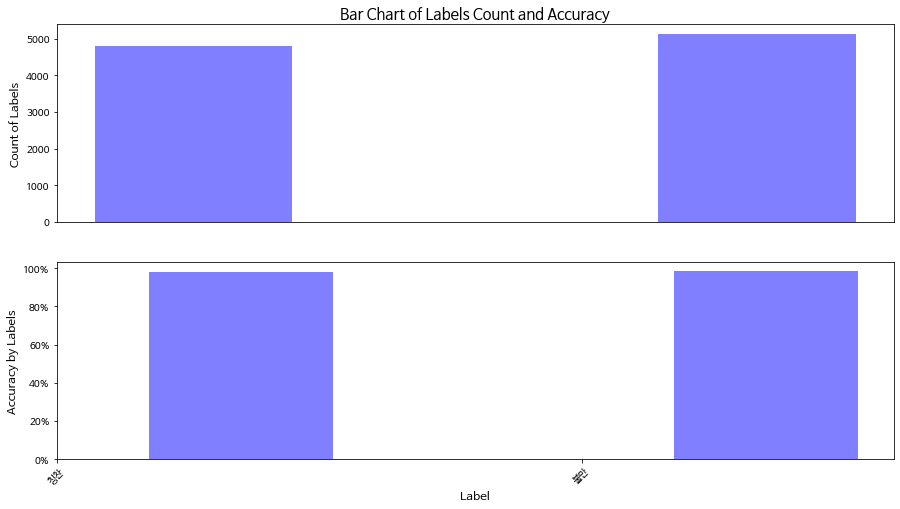

08/11/2021 18:53:04 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:53:04 - INFO - __main__ -     acc = 0.9833920483140413


                                              Review  ...                  Softmax
0  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...  [-1.6474148, 1.7239403]
1                               대기시간만 짧아진다면 아주 만족합니다  ...   [2.2020543, -2.245902]
2                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...   [2.007693, -2.0862508]
3                                     대기시간 이 조금 더 짧게  ...  [1.4961066, -1.6540682]
4  타 카드사는 27일 결제일도 있고 080수신자 번호도 있고 전화를 하자마자 받는 상...  ...  [-0.9907217, 0.9476023]

[5 rows x 4 columns]
{'acc': 0.9833920483140413}


08/11/2021 18:53:07 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-448


loss: 0.15290582764122163
loss: 0.15260989799267716
loss: 0.15231318088731585
loss: 0.15201970095853362
loss: 0.15173841379665118
loss: 0.1514428291584689
loss: 0.15115407127682323
loss: 0.15093316295053483
loss: 0.15064269038940284
loss: 0.15041211544735333
loss: 0.15012879699695864
loss: 0.14991131917290065
loss: 0.1496470040377076
loss: 0.14943275555516733
loss: 0.14914640186447048
loss: 0.14887079425107944
loss: 0.14858982845419838
loss: 0.14840870992132651
loss: 0.14819217940325782
loss: 0.14791728472973928
loss: 0.14764709468843587
loss: 0.1473742813664548
loss: 0.14710763862431683
loss: 0.1469751665116114
loss: 0.14681708562260704
loss: 0.14655894458781188
loss: 0.14632779477066116
loss: 0.14606674984801843
loss: 0.1458341350322062
loss: 0.14557395285096753
loss: 0.1453148555243874
loss: 0.14518490734432513
loss: 0.1449177656361442
loss: 0.14465227552314763
loss: 0.1443968689219552
loss: 0.14425641413747278
loss: 0.14406543622158238
loss: 0.14383581424814193
loss: 0.143644472480

08/11/2021 18:54:25 - INFO - __main__ -   ***** Running evaluation on test dataset (512 step) *****
08/11/2021 18:54:25 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:54:25 - INFO - __main__ -     Eval Batch size = 128


loss: 0.13843102976352384


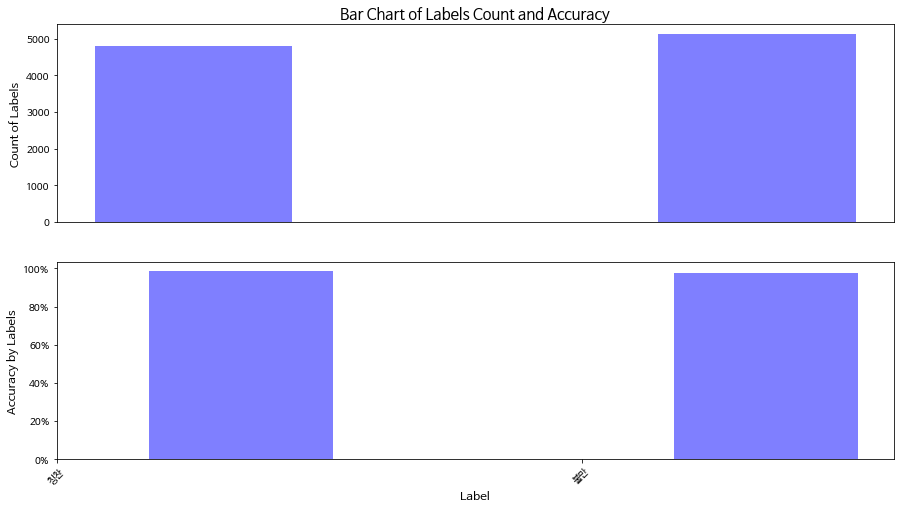

08/11/2021 18:54:35 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:54:35 - INFO - __main__ -     acc = 0.9818822345244087


                                              Review  ...                    Softmax
0             친절하게 대해주시면 다소 불평불만이 있다가도 풀어집니다 대부분의 사람  ...   [0.3308198, -0.55289835]
1  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...  [-0.97909456, 0.91711015]
2                               대기시간만 짧아진다면 아주 만족합니다  ...    [2.3308713, -2.3543675]
3                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...    [2.2109952, -2.2603946]
4                                     대기시간 이 조금 더 짧게  ...    [1.7926275, -1.9313806]

[5 rows x 4 columns]
{'acc': 0.9818822345244087}


08/11/2021 18:54:37 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-512


loss: 0.138194665361784
loss: 0.13796350205360625
loss: 0.13773807978203284
loss: 0.1374994190806855
loss: 0.13732687819468098
loss: 0.13709029164812508
loss: 0.13685791418387022
loss: 0.1367235673734775
loss: 0.13649411757624996
loss: 0.13627437613476281
loss: 0.13604668617590435
loss: 0.1358755585730417
loss: 0.1356494752424104
loss: 0.13542101228567188
loss: 0.13519871065771275
loss: 0.13498831225142843
loss: 0.13478914538965278
loss: 0.13466263539069948
loss: 0.13457234583184713
loss: 0.1343516366559788
loss: 0.1341247586987731
loss: 0.13390118137267087
loss: 0.13371157870044775
loss: 0.13356143856462813
loss: 0.13334489522200058
loss: 0.13315259159082152
loss: 0.13293580508381406
loss: 0.13271770729959287
loss: 0.1324983608879686
loss: 0.13228713288710786
loss: 0.13209290362373133
loss: 0.13190846723463276
loss: 0.13169201276341982
loss: 0.13153902178753044
loss: 0.1313894618340041
loss: 0.13123533836851425
loss: 0.1310419146198854
loss: 0.13092446739192715
loss: 0.130833972673085

08/11/2021 18:55:55 - INFO - __main__ -   ***** Running evaluation on test dataset (576 step) *****
08/11/2021 18:55:55 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:55:55 - INFO - __main__ -     Eval Batch size = 128


loss: 0.12686114528817902


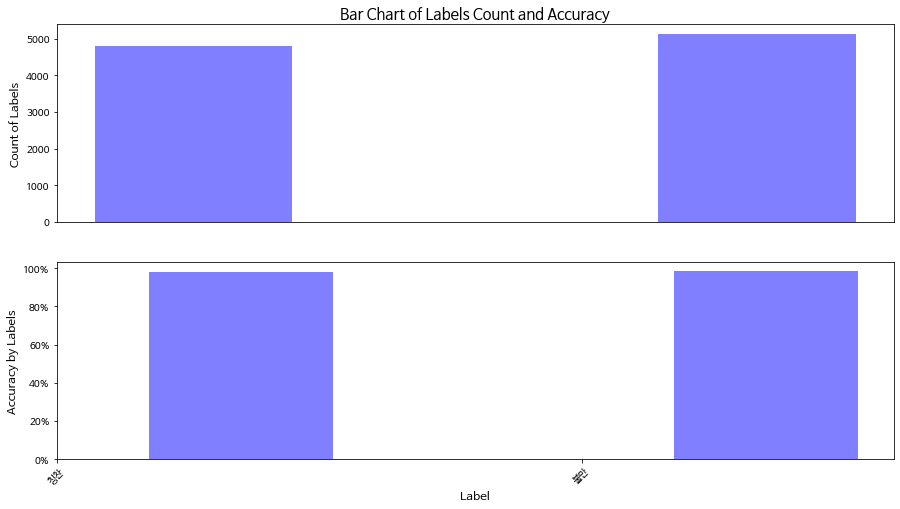

08/11/2021 18:56:05 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:56:05 - INFO - __main__ -     acc = 0.9838953195772522


                                              Review  ...                   Softmax
0  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...   [-1.4402474, 1.4492368]
1                               대기시간만 짧아진다면 아주 만족합니다  ...   [2.4061818, -2.4306884]
2                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...     [2.1630156, -2.23814]
3                                     대기시간 이 조금 더 짧게  ...    [1.3219484, -1.497232]
4  타 카드사는 27일 결제일도 있고 080수신자 번호도 있고 전화를 하자마자 받는 상...  ...  [-0.67167974, 0.5661201]

[5 rows x 4 columns]
{'acc': 0.9838953195772522}


08/11/2021 18:56:07 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-576


loss: 0.12666479415022985
loss: 0.1265259710024514
loss: 0.12638522064496663
loss: 0.1262006910020036
loss: 0.12603510414024177
loss: 0.12589384929542638
loss: 0.1257201159136501
loss: 0.1255432441878477
loss: 0.12535095882371194
loss: 0.12516419455224692
loss: 0.1250283013588195
loss: 0.12489460232401532
loss: 0.1247074044371223
loss: 0.1245230609787849
loss: 0.12439509680535638
loss: 0.12425904015135775
loss: 0.1240709917305719
loss: 0.12388819773283219
loss: 0.1237065911527817
loss: 0.12359579974291658
loss: 0.12342670362230572
loss: 0.1232418627976549
loss: 0.12308217471742222
loss: 0.12294850983191281
loss: 0.1228143263859256
loss: 0.12269775600843998
loss: 0.12251632065229599
loss: 0.12237837261347631
loss: 0.1221963808202177
loss: 0.12207326391502821
loss: 0.12190206787553562
loss: 0.1217682567091144
loss: 0.12159581862432861
loss: 0.12141814886546526
loss: 0.12124230519528524
loss: 0.12106648423812455
loss: 0.12094780057972543
loss: 0.12078134586021352
loss: 0.12061799254601564

08/11/2021 18:57:25 - INFO - __main__ -   ***** Running evaluation on test dataset (640 step) *****
08/11/2021 18:57:25 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:57:25 - INFO - __main__ -     Eval Batch size = 128


loss: 0.11680469157145126


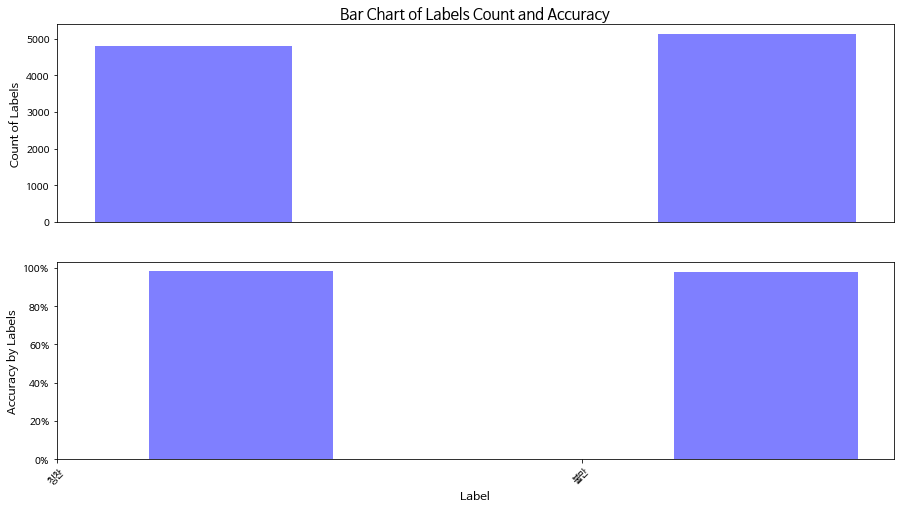

08/11/2021 18:57:35 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:57:35 - INFO - __main__ -     acc = 0.9818822345244087


                                              Review  ...                     Softmax
0             친절하게 대해주시면 다소 불평불만이 있다가도 풀어집니다 대부분의 사람  ...  [0.112226345, -0.32043833]
1  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...     [-1.1631321, 1.1180243]
2                               대기시간만 짧아진다면 아주 만족합니다  ...       [2.4843385, -2.50113]
3                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...       [2.2560265, -2.32223]
4                                     대기시간 이 조금 더 짧게  ...     [1.7622737, -1.9160455]

[5 rows x 4 columns]
{'acc': 0.9818822345244087}


08/11/2021 18:57:37 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-640


loss: 0.11671820115414266
loss: 0.1166144325804093
loss: 0.11645164988604759
loss: 0.11628929607321432
loss: 0.11614041083687267
loss: 0.11598518960921803
loss: 0.11589245756849118
loss: 0.11578834466319991
loss: 0.11564903145079115
loss: 0.11552708129040323
loss: 0.11536813795869846
loss: 0.11521030484950112
loss: 0.11506925176281431
loss: 0.11493716744523758
loss: 0.11480961204399817
loss: 0.11470151241306534
loss: 0.11455800182283878
loss: 0.11443930857964879
loss: 0.11428731054559418
loss: 0.11413225161165676
loss: 0.11397700628713787
loss: 0.11382146390700809
loss: 0.11366794279567212
loss: 0.11351542454212904
loss: 0.11337201057800225
loss: 0.11327660940979067
loss: 0.11313292460664101
loss: 0.11298071357427154
loss: 0.11289233843251639
loss: 0.11279258851184329
loss: 0.11264238937656589
loss: 0.1124928771931168
loss: 0.11239424305947229
loss: 0.11232384724420902
loss: 0.11217898465968944
loss: 0.11205258158162325
loss: 0.1119050869052374
loss: 0.1118143767346477
loss: 0.11167055

08/11/2021 18:58:55 - INFO - __main__ -   ***** Running evaluation on test dataset (704 step) *****
08/11/2021 18:58:55 - INFO - __main__ -     Num examples = 1987
08/11/2021 18:58:55 - INFO - __main__ -     Eval Batch size = 128


loss: 0.10844012200620702


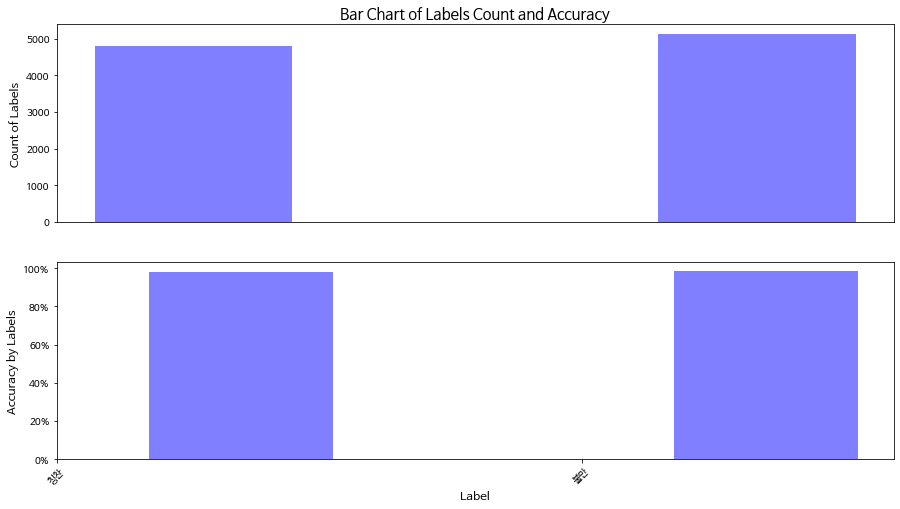

08/11/2021 18:59:05 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 18:59:05 - INFO - __main__ -     acc = 0.9833920483140413


                                              Review  ...                  Softmax
0  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...   [-1.670671, 1.7167662]
1                               대기시간만 짧아진다면 아주 만족합니다  ...    [2.536659, -2.549772]
2                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...  [2.2383068, -2.3154242]
3                                     대기시간 이 조금 더 짧게  ...  [1.4301358, -1.5984275]
4  타 카드사는 27일 결제일도 있고 080수신자 번호도 있고 전화를 하자마자 받는 상...  ...  [-1.5539608, 1.5780793]

[5 rows x 4 columns]
{'acc': 0.9833920483140413}


08/11/2021 18:59:07 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-704


loss: 0.10832220792559022
loss: 0.10818219251228924
loss: 0.1080432233204367
loss: 0.10790654676729593
loss: 0.10777683102897512
loss: 0.10763926859551542
loss: 0.10750723043888934
loss: 0.10737488444585855
loss: 0.1072515546687752
loss: 0.10712252076616098
loss: 0.10703707124152176
loss: 0.10693333902417074
loss: 0.10685164643376234
loss: 0.10672746519467334
loss: 0.10659674638221675
loss: 0.10646513407894721
loss: 0.10633476104861159
loss: 0.10625114108221682
loss: 0.10614132337055761
loss: 0.10606322879517112
loss: 0.10604291736565787
loss: 0.10591332188656057
loss: 0.10579397198468693
loss: 0.10571573487518784
loss: 0.10559053364911197
loss: 0.10546313158351264
loss: 0.10533358505895175
loss: 0.10520317003670368
loss: 0.10509673199307626
loss: 0.10496634590929267
loss: 0.10490245002442274
loss: 0.10486659681318207
loss: 0.10474437331778264
loss: 0.10474984996086416
loss: 0.10463774158003084
loss: 0.1045119458494859
loss: 0.10438336256021752
loss: 0.10430066123845763
loss: 0.1041734

08/11/2021 19:00:25 - INFO - __main__ -   ***** Running evaluation on test dataset (768 step) *****
08/11/2021 19:00:25 - INFO - __main__ -     Num examples = 1987
08/11/2021 19:00:25 - INFO - __main__ -     Eval Batch size = 128


loss: 0.10133570836478611


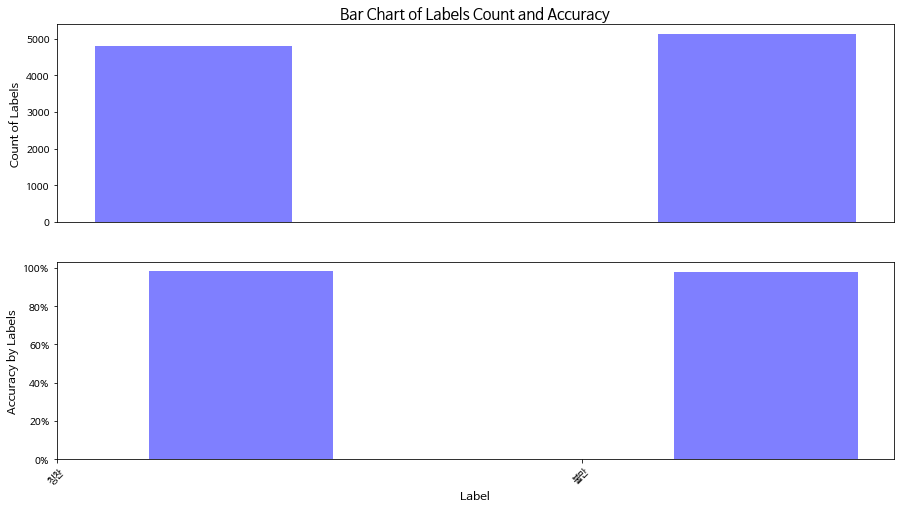

08/11/2021 19:00:34 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 19:00:34 - INFO - __main__ -     acc = 0.9823855057876195


                                              Review  ...                    Softmax
0             친절하게 대해주시면 다소 불평불만이 있다가도 풀어집니다 대부분의 사람  ...  [0.20127577, -0.40321404]
1  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...    [-1.2534536, 1.2181764]
2                               대기시간만 짧아진다면 아주 만족합니다  ...    [2.6042907, -2.6105793]
3                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...    [2.4029343, -2.4529111]
4                                     대기시간 이 조금 더 짧게  ...    [1.9300125, -2.0649645]

[5 rows x 4 columns]
{'acc': 0.9823855057876195}


08/11/2021 19:00:37 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-768


loss: 0.10123217442062028
loss: 0.10111609110366795
loss: 0.10104196612275025
loss: 0.100985911099356
loss: 0.10087241993597763
loss: 0.10075570512033556
loss: 0.10068202882043777
loss: 0.10056415825755786
loss: 0.10044627286675968
loss: 0.10038495995583142
loss: 0.1002836282842043
loss: 0.10016694461496976
loss: 0.1001013249311496
loss: 0.09999973798537498
loss: 0.09988386475743957
loss: 0.09980991345055744
loss: 0.09969400504165014
loss: 0.09957821311135291
loss: 0.09946271730291041
loss: 0.09939494923343362
loss: 0.09928052868996246
loss: 0.09916615146978558
loss: 0.09905322945256413
loss: 0.09895887640610601
loss: 0.09888307091957346
loss: 0.098800633584738
loss: 0.09868806704949096
loss: 0.09861774240320914
loss: 0.09855129908527267
loss: 0.09848040902408256
loss: 0.0983702839901193
loss: 0.09825918172020465
loss: 0.09815797864107156
loss: 0.09804668457031325
loss: 0.0979379222485913
loss: 0.09782757396364945
loss: 0.09771848092584506
loss: 0.09761766251869888
loss: 0.097509496922

08/11/2021 19:01:54 - INFO - __main__ -   ***** Running evaluation on test dataset (832 step) *****
08/11/2021 19:01:54 - INFO - __main__ -     Num examples = 1987
08/11/2021 19:01:54 - INFO - __main__ -     Eval Batch size = 128


loss: 0.09530421931077189


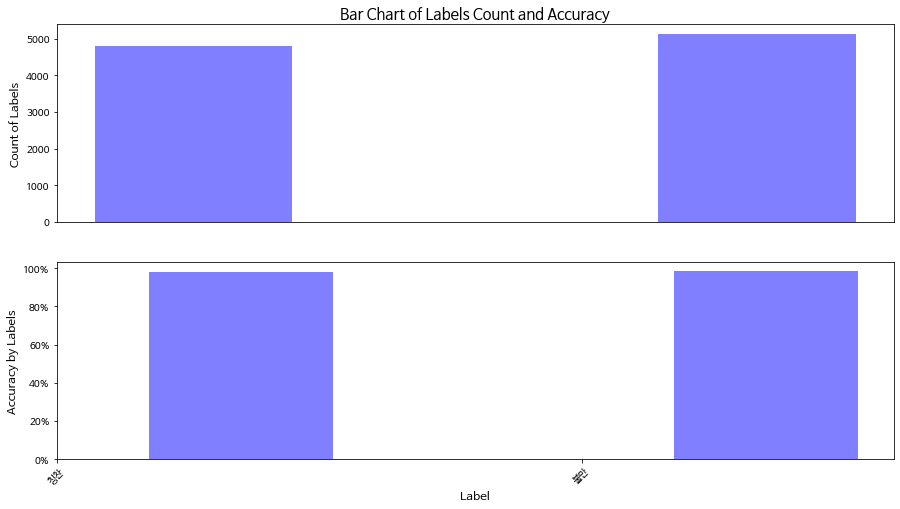

08/11/2021 19:02:04 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 19:02:04 - INFO - __main__ -     acc = 0.9838953195772522


                                              Review  ...                  Softmax
0  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...  [-1.4692938, 1.4797302]
1                               대기시간만 짧아진다면 아주 만족합니다  ...  [2.6541758, -2.6587133]
2                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...  [2.4110916, -2.4670644]
3                                     대기시간 이 조금 더 짧게  ...  [1.7332643, -1.8800366]
4  타 카드사는 27일 결제일도 있고 080수신자 번호도 있고 전화를 하자마자 받는 상...  ...  [-0.825722, 0.75518477]

[5 rows x 4 columns]
{'acc': 0.9838953195772522}


08/11/2021 19:02:06 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-832


loss: 0.0952346923147269
loss: 0.09513045669526612
loss: 0.09502752327142719
loss: 0.09496538962892583
loss: 0.09489301824218982
loss: 0.09479318370571391
loss: 0.09469044109955163
loss: 0.09462509423583036
loss: 0.09452211859278319
loss: 0.0944641476337778
loss: 0.09436336401209218
loss: 0.09426183036144523
loss: 0.09416346243037098
loss: 0.09406585100791626
loss: 0.09396473034103582
loss: 0.09386389379670738
loss: 0.09376427160468484
loss: 0.09366369033451466
loss: 0.09359301226465283
loss: 0.09349700618981266
loss: 0.09339714423258727
loss: 0.09330250671246815
loss: 0.09320334528207953
loss: 0.0931196611463832
loss: 0.09302343504096934
loss: 0.09293050394829858
loss: 0.09287489562407049
loss: 0.09277607697538685
loss: 0.09267739959831299
loss: 0.09260940180957455
loss: 0.09252524343108799
loss: 0.09246193239879277
loss: 0.09236519608775833
loss: 0.09231132157813697
loss: 0.09221502958722799
loss: 0.0921178138106718
loss: 0.09203340761766472
loss: 0.09198481689753203
loss: 0.09188858

08/11/2021 19:03:24 - INFO - __main__ -   ***** Running evaluation on test dataset (896 step) *****
08/11/2021 19:03:24 - INFO - __main__ -     Num examples = 1987
08/11/2021 19:03:24 - INFO - __main__ -     Eval Batch size = 128


loss: 0.08990143783272028


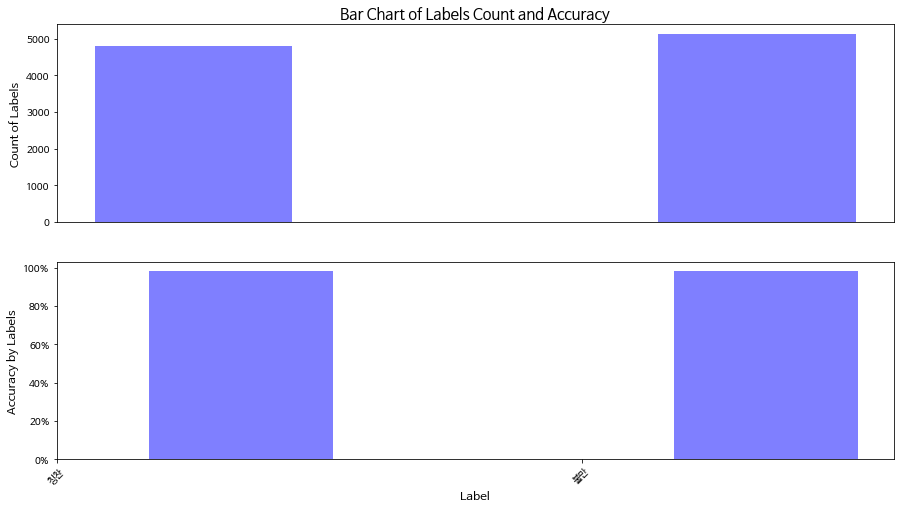

08/11/2021 19:03:34 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 19:03:34 - INFO - __main__ -     acc = 0.9823855057876195


                                              Review  ...                      Softmax
0             친절하게 대해주시면 다소 불평불만이 있다가도 풀어집니다 대부분의 사람  ...  [-0.032539524, -0.13857773]
1  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...      [-1.3576753, 1.3542218]
2                               대기시간만 짧아진다면 아주 만족합니다  ...      [2.6944945, -2.6961133]
3                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...      [2.4493346, -2.5010855]
4                                     대기시간 이 조금 더 짧게  ...      [1.8337649, -1.9744564]

[5 rows x 4 columns]
{'acc': 0.9823855057876195}


08/11/2021 19:03:36 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-896


loss: 0.08981391281115852
loss: 0.08972294069463616
loss: 0.08963392057442608
loss: 0.08954322963901278
loss: 0.08945505368315536
loss: 0.0894177762802872
loss: 0.08939245812840356
loss: 0.08930390624306783
loss: 0.08921435960100253
loss: 0.08912465475020605
loss: 0.08914379352835124
loss: 0.08909599024275244
loss: 0.089006771245916
loss: 0.08896876627958002
loss: 0.08892332277854682
loss: 0.0888367421570716
loss: 0.08875051107786
loss: 0.08866217934029254
loss: 0.08857459062913972
loss: 0.08849204631926956
loss: 0.08845130983189625
loss: 0.08836384360426895
loss: 0.08827703074178171
loss: 0.08818940026483134
loss: 0.08810295992157746
loss: 0.0880162649719275
loss: 0.08793036941790051
loss: 0.0878438060776657
loss: 0.08776453430990915
loss: 0.08767808466137952
loss: 0.08759201107197065
loss: 0.08750530326606482
loss: 0.08745571633598359
loss: 0.08737057031542864
loss: 0.08728484653044496
loss: 0.08720905897247529
loss: 0.08713377831006644
loss: 0.08704911831096293
loss: 0.0869985446274

08/11/2021 19:04:54 - INFO - __main__ -   ***** Running evaluation on test dataset (960 step) *****
08/11/2021 19:04:54 - INFO - __main__ -     Num examples = 1987
08/11/2021 19:04:54 - INFO - __main__ -     Eval Batch size = 128


loss: 0.0852039176961019


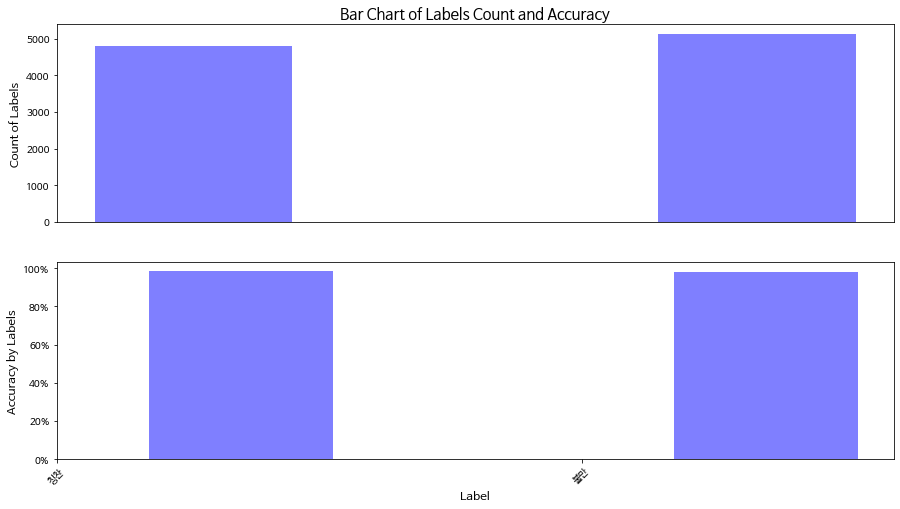

08/11/2021 19:05:03 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 19:05:03 - INFO - __main__ -     acc = 0.9828887770508304


                                              Review  ...                   Softmax
0             친절하게 대해주시면 다소 불평불만이 있다가도 풀어집니다 대부분의 사람  ...  [0.6886544, -0.89439875]
1  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...   [-0.8899919, 0.8149359]
2                               대기시간만 짧아진다면 아주 만족합니다  ...   [2.7356691, -2.7329378]
3                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...     [2.531222, -2.570502]
4                                     대기시간 이 조금 더 짧게  ...   [2.0814333, -2.2063851]

[5 rows x 4 columns]
{'acc': 0.9828887770508304}


08/11/2021 19:05:05 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-960


loss: 0.08512377333958147
loss: 0.08506236791033724
loss: 0.08502246783262937
loss: 0.08496457360456872
loss: 0.08488464432869859
loss: 0.0848446066662916
loss: 0.08476421289529262
loss: 0.08469463790110736
loss: 0.08461446274106532
loss: 0.0845371420456807
loss: 0.08449582581290348
loss: 0.08441678890115256
loss: 0.08437744875889337
loss: 0.08430307058070535
loss: 0.08422490685318525
loss: 0.08414642125049407
loss: 0.08406965977568541
loss: 0.08399200997913374
loss: 0.08391411603305705
loss: 0.08383607842427279
loss: 0.08380234972967801
loss: 0.0837255576976372
loss: 0.08367938968132223
loss: 0.0836426856335086
loss: 0.08357376893745914
loss: 0.0834963620039606
loss: 0.08342470362472981
loss: 0.08334743590772846
loss: 0.08327052182601756
loss: 0.08320123665505136
loss: 0.08312626779981627
loss: 0.0830519079763983
loss: 0.08301553226939862
loss: 0.08294717768315878
loss: 0.08290885595707738
loss: 0.08283278998361535
loss: 0.0828298105070799
loss: 0.08275449443617855
loss: 0.08268013257

08/11/2021 19:06:23 - INFO - __main__ -   ***** Running evaluation on test dataset (1024 step) *****
08/11/2021 19:06:23 - INFO - __main__ -     Num examples = 1987
08/11/2021 19:06:23 - INFO - __main__ -     Eval Batch size = 128


loss: 0.08106777889088335


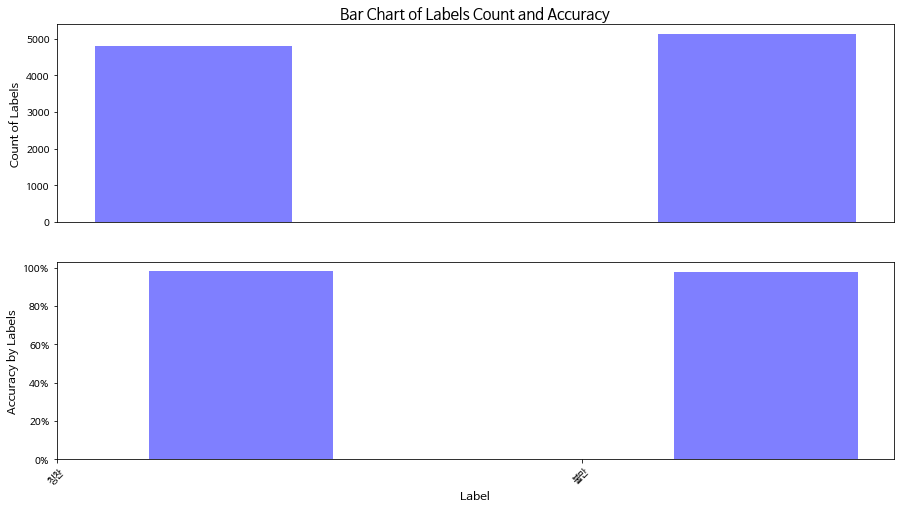

08/11/2021 19:06:33 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 19:06:33 - INFO - __main__ -     acc = 0.980875691997987


                                              Review  ...                    Softmax
0     이메일 상담을 한지 3일이 지났는데도 회신이 없어서 전화 상담으로 완료 해결했습니다  ...  [0.07626307, -0.20569493]
1             친절하게 대해주시면 다소 불평불만이 있다가도 풀어집니다 대부분의 사람  ...    [0.51141787, -0.714444]
2  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...     [-1.0757419, 1.022541]
3                               대기시간만 짧아진다면 아주 만족합니다  ...    [2.7537038, -2.7478268]
4                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...     [2.532407, -2.5708792]

[5 rows x 4 columns]
{'acc': 0.980875691997987}


08/11/2021 19:06:35 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-1024


loss: 0.08099540717763508
loss: 0.08092707028879365
loss: 0.08089463972144678
loss: 0.08084436256034437
loss: 0.08080777354344755
loss: 0.0807502655570115
loss: 0.08067886388221995
loss: 0.08061660038146674
loss: 0.0805454633414154
loss: 0.0804750117211201
loss: 0.08042086955600819
loss: 0.08035198942098307
loss: 0.08028882755085165
loss: 0.08021805307474382
loss: 0.08017231685874035
loss: 0.08010428402071389
loss: 0.08004065683088288
loss: 0.07997788432824664
loss: 0.07993798105140804
loss: 0.0798690837916786
loss: 0.07979956889685474
loss: 0.07975925179420976
loss: 0.07969131013876629
loss: 0.07962171291312174
loss: 0.07955365791229675
loss: 0.07952416764705308
loss: 0.07945534745124935
loss: 0.07942482251665084
loss: 0.07939401288903322
loss: 0.07932603159836323
loss: 0.07925786709819006
loss: 0.07918963553101728
loss: 0.07914590645958594
loss: 0.07907849762743667
loss: 0.07902808436759809
loss: 0.07895952602189456
loss: 0.07889154287797735
loss: 0.07884072957002679
loss: 0.07881217

08/11/2021 19:07:53 - INFO - __main__ -   ***** Running evaluation on test dataset (1088 step) *****
08/11/2021 19:07:53 - INFO - __main__ -     Num examples = 1987
08/11/2021 19:07:53 - INFO - __main__ -     Eval Batch size = 128


loss: 0.07732861182611327


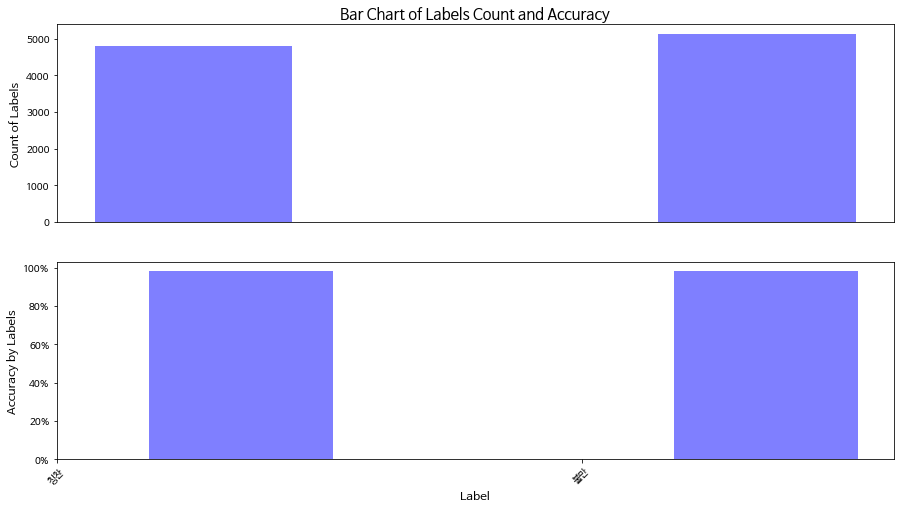

08/11/2021 19:08:03 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 19:08:03 - INFO - __main__ -     acc = 0.9823855057876195


                                              Review  ...                    Softmax
0  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...    [-1.4165922, 1.4138153]
1                               대기시간만 짧아진다면 아주 만족합니다  ...     [2.7787418, -2.772634]
2                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...     [2.5366833, -2.580823]
3                                     대기시간 이 조금 더 짧게  ...    [1.9463415, -2.0836852]
4  타 카드사는 27일 결제일도 있고 080수신자 번호도 있고 전화를 하자마자 받는 상...  ...  [-0.53765416, 0.43879792]

[5 rows x 4 columns]
{'acc': 0.9823855057876195}


08/11/2021 19:08:05 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-1088


loss: 0.07726448247400758
loss: 0.0772022020810822
loss: 0.07713762776521534
loss: 0.07707391537200564
loss: 0.07704865533521114
loss: 0.07698450557218432
loss: 0.07692741381565797
loss: 0.07686752638903643
loss: 0.07683629649771936
loss: 0.07684409327148536
loss: 0.07678019795126136
loss: 0.07671727632722733
loss: 0.07665464693771762
loss: 0.07659209629828398
loss: 0.07657350325857307
loss: 0.07657058070332784
loss: 0.07650718075893313
loss: 0.07646886112293057
loss: 0.07640696829058695
loss: 0.07635852562293867
loss: 0.0762962593165427
loss: 0.07623378598752122
loss: 0.07617168593439202
loss: 0.07611199695970394
loss: 0.07608392514808895
loss: 0.07602156655063695
loss: 0.07595939408996114
loss: 0.07589730449933826
loss: 0.07586728476426476
loss: 0.07580652057479781
loss: 0.0757836775943284
loss: 0.07572204191570303
loss: 0.07566556684842315
loss: 0.07560491351387505
loss: 0.07554365114498807
loss: 0.07550818564741478
loss: 0.0754567607757118
loss: 0.07539584116636383
loss: 0.07533553

08/11/2021 19:09:23 - INFO - __main__ -   ***** Running evaluation on test dataset (1152 step) *****
08/11/2021 19:09:23 - INFO - __main__ -     Num examples = 1987
08/11/2021 19:09:23 - INFO - __main__ -     Eval Batch size = 128


loss: 0.07403940347406508


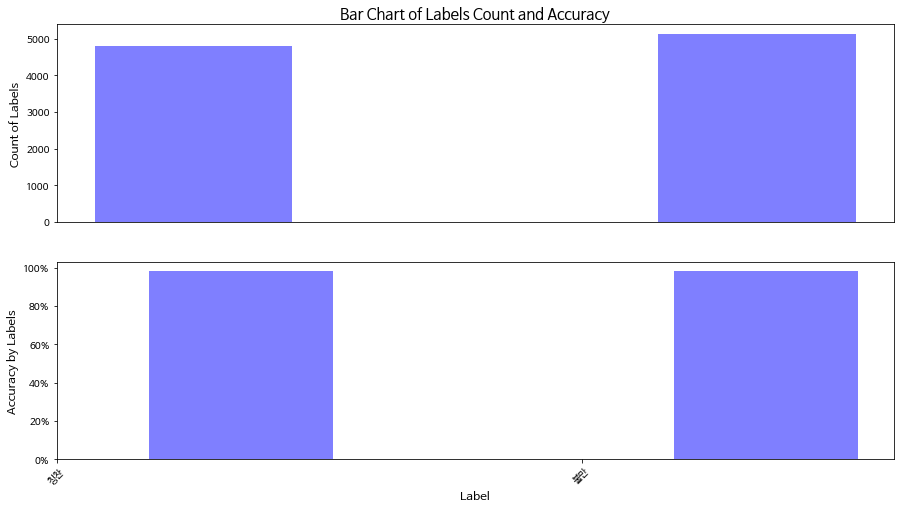

08/11/2021 19:09:32 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 19:09:32 - INFO - __main__ -     acc = 0.9828887770508304


                                              Review  ...                  Softmax
0  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...  [-1.5102671, 1.5209159]
1                               대기시간만 짧아진다면 아주 만족합니다  ...  [2.7946854, -2.7867866]
2                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...  [2.5488338, -2.5915456]
3                                     대기시간 이 조금 더 짧게  ...  [1.9696466, -2.1025972]
4  타 카드사는 27일 결제일도 있고 080수신자 번호도 있고 전화를 하자마자 받는 상...  ...  [-0.6137932, 0.5255609]

[5 rows x 4 columns]
{'acc': 0.9828887770508304}


08/11/2021 19:09:34 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-1152


loss: 0.07398581853401358
loss: 0.07392809495363753
loss: 0.07387434678007063
loss: 0.0738162130361526
loss: 0.07375801473054246
loss: 0.0737006079658081
loss: 0.07364314168167715
loss: 0.07363845782177844
loss: 0.07358076679139276
loss: 0.07352350788870618
loss: 0.07346801604092223
loss: 0.07342930192838318
loss: 0.07337221189246157
loss: 0.07331708439515575
loss: 0.07326122519704605
loss: 0.07320480814764965
loss: 0.07314777437046209
loss: 0.0730913937282868
loss: 0.07306921591522549
loss: 0.07301314839649843
loss: 0.07295595969606226
loss: 0.07293654985375246
loss: 0.0728854930484073
loss: 0.07285979289924219
loss: 0.0728372090065673
loss: 0.07278172888734546
loss: 0.07272618249227768
loss: 0.07267132003325968
loss: 0.07267239133675191
loss: 0.07261673842522107
loss: 0.07256120444092008
loss: 0.07251815843620854
loss: 0.07246465878403954
loss: 0.07240883929578
loss: 0.07235320248753271
loss: 0.07229771456870905
loss: 0.07224359027406904
loss: 0.07222050264626428
loss: 0.072165263029

08/11/2021 19:10:52 - INFO - __main__ -   ***** Running evaluation on test dataset (1216 step) *****
08/11/2021 19:10:52 - INFO - __main__ -     Num examples = 1987
08/11/2021 19:10:52 - INFO - __main__ -     Eval Batch size = 128


loss: 0.0709330893510732


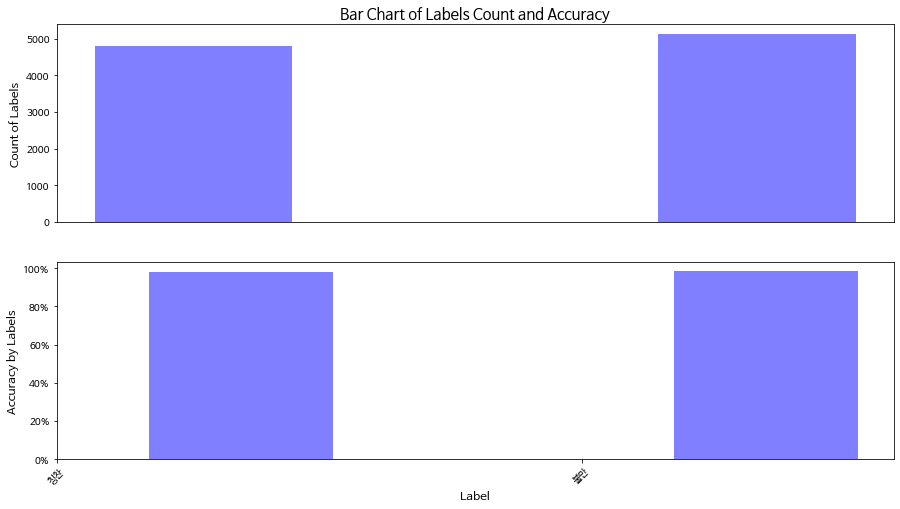

08/11/2021 19:11:03 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 19:11:03 - INFO - __main__ -     acc = 0.9833920483140413


                                              Review  ...                      Softmax
0                 상담원과 직접 통화 시 대기시간 없이 바로 [UNK] 좋습니다  ...  [-0.10527938, -0.099300414]
1  상담한 직원분이 끝까지 책임지고 해결해 주시는 부분은 다 카드사에서는 보기 힘든데 ...  ...        [-1.558798, 1.576775]
2                               대기시간만 짧아진다면 아주 만족합니다  ...      [2.8021188, -2.7938633]
3                 보이는 ARS 서비스되나요 다른 카드사는 바로 보여서 편리해요  ...      [2.5428011, -2.5871835]
4                                     대기시간 이 조금 더 짧게  ...      [1.9320676, -2.0667484]

[5 rows x 4 columns]
{'acc': 0.9833920483140413}


08/11/2021 19:11:05 - INFO - __main__ -   Saving model checkpoint to sentiment_checkpoints/checkpoint-1216


loss: 0.07088429112164893
loss: 0.07083131926828515
loss: 0.07077890772172314
loss: 0.07079161960196483
loss: 0.07074174769703272
loss: 0.07072228265190024
loss: 0.07070361130748276
loss: 0.0706560404463732
loss: 0.07063464772982561
loss: 0.0705830678715998
loss: 0.07053087311383176
loss: 0.07048391631397902
loss: 0.07043278716281784
loss: 0.07038415849958433
loss: 0.07033295346050245
loss: 0.07028101029913184
loss: 0.07022925899367831
loss: 0.07017842376215241
loss: 0.07012657289645872
loss: 0.0700752585572507
loss: 0.07003650193802091
loss: 0.0700115642629967
loss: 0.06996164171632509
loss: 0.06993053710696498
loss: 0.06988628448447172
loss: 0.06986666902646291
loss: 0.06981586845335419
loss: 0.06976498807615741
loss: 0.06971417038914669
loss: 0.06966358999853257
loss: 0.06964662066326979
loss: 0.0696284863788139
loss: 0.06957824449774454
loss: 0.06952776912748813
loss: 0.06947743016772336
loss: 0.06942713223048114
loss: 0.06939928112209663
loss: 0.06935090649140735
loss: 0.069301910

08/11/2021 19:11:59 - INFO - __main__ -    global_step = 1260, average loss = 0.06905300677532242


In [17]:
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from fastprogress.fastprogress import master_bar, progress_bar

# GPU or CPU
args.device = "cuda" if torch.cuda.is_available() and not args.no_cuda else "cpu"
model.to(args.device)

# Train

global_step, tr_loss, full_text = train(args, model, train_dataset, test_dataset)
logger.info(" global_step = {}, average loss = {}".format(global_step, tr_loss))

08/11/2021 10:20:10 - INFO - __main__ -   Evaluate the following checkpoints: ['koelectra-base-v3-nsmc-ckpt/checkpoint-1', 'koelectra-base-v3-nsmc-ckpt/checkpoint-10', 'koelectra-base-v3-nsmc-ckpt/checkpoint-1000', 'koelectra-base-v3-nsmc-ckpt/checkpoint-11', 'koelectra-base-v3-nsmc-ckpt/checkpoint-1250', 'koelectra-base-v3-nsmc-ckpt/checkpoint-1500', 'koelectra-base-v3-nsmc-ckpt/checkpoint-1750', 'koelectra-base-v3-nsmc-ckpt/checkpoint-2', 'koelectra-base-v3-nsmc-ckpt/checkpoint-2000', 'koelectra-base-v3-nsmc-ckpt/checkpoint-2250', 'koelectra-base-v3-nsmc-ckpt/checkpoint-250', 'koelectra-base-v3-nsmc-ckpt/checkpoint-2500', 'koelectra-base-v3-nsmc-ckpt/checkpoint-3', 'koelectra-base-v3-nsmc-ckpt/checkpoint-4', 'koelectra-base-v3-nsmc-ckpt/checkpoint-5', 'koelectra-base-v3-nsmc-ckpt/checkpoint-500', 'koelectra-base-v3-nsmc-ckpt/checkpoint-6', 'koelectra-base-v3-nsmc-ckpt/checkpoint-7', 'koelectra-base-v3-nsmc-ckpt/checkpoint-750', 'koelectra-base-v3-nsmc-ckpt/checkpoint-8', 'koelectra-b

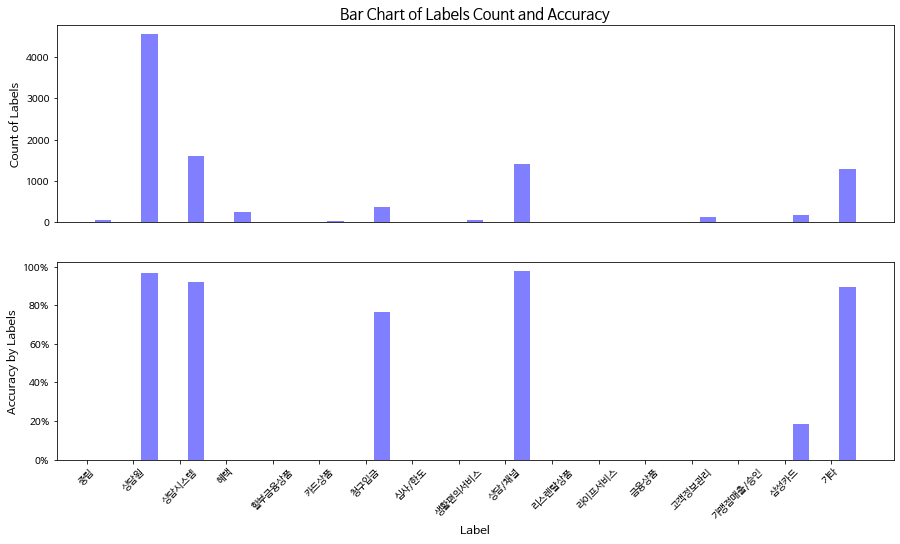

08/11/2021 10:20:35 - INFO - __main__ -   ***** Eval results on test dataset *****
08/11/2021 10:20:35 - INFO - __main__ -     acc = 0.8701947079380928


                                              Review  Label Prediction
0  삼성카드 택배 배달 시 사전 전화 약속하고 카드 배달하세요 기본 아닙니까 집에서 작...   카드상품        상담원
1  홈페이지를 이용할 경우 오류가 잦아 매우 불편함 전화 문의는 대기 시간이 오래 걸려...  상담시스템      상담/채널
2  상담원과의 통화대기시간안내가 현실적으로 차이가 있을 때입니다 대기시간이 1시간 정도...  상담시스템      상담/채널
3                                 상담원 연결까지 너무 오랴 걸려요  상담시스템      상담/채널
4                4번과 5번은 크게 의미 없는데 다음단게로 넘어가기 위한 클릭임    상담원      상담/채널
{'acc': 0.8701947079380928}


KeyboardInterrupt: ignored

In [ ]:
results = {}
checkpoints = list(
            os.path.dirname(c) for c in
            sorted(glob.glob(args.output_dir + "/**/" + "pytorch_model.bin", recursive=True))
        )
if not args.eval_all_checkpoints:
    checkpoints = checkpoints[-1:]
else:
    logging.getLogger("transformers.configuration_utils").setLevel(logging.WARN)  # Reduce logging
    logging.getLogger("transformers.modeling_utils").setLevel(logging.WARN)  # Reduce logging
logger.info("Evaluate the following checkpoints: %s", checkpoints)
for checkpoint in checkpoints:
    global_step = checkpoint.split("-")[-1]
    model = args.model.from_pretrained(checkpoint)
    model.to(args.device)
    result = evaluate(args, model, full_text, test_dataset, mode="test", global_step=global_step)
    result = dict((k + "_{}".format(global_step), v) for k, v in result.items())
    results.update(result)

output_eval_file = os.path.join(args.output_dir, "eval_results.txt")
with open(output_eval_file, "w") as f_w:
    for key in sorted(results.keys()):
        f_w.write("{} = {}\n".format(key, str(results[key])))

In [ ]:
# 수정금지: 타임스탬프
_model_build_end_time = printt("Model building: Start")
print(_model_build_end_time - _model_build_start_time)

NameError: ignored

#모델 분류

In [ ]:
# 수정금지: 타임스탬프
_test_start_time = printt("TEST: Start")

In [ ]:
#TODO: 해당 블럭에 테스트 수행을 위한 코드를 넣으세요. (시간측정 구간)
#분석 파일은 tsv 파일로 제공되며, 제공되는 학습데이터 파일과 동일한 레이아웃(단, 정답 분류 =공백)으로 제공됩니다.




In [ ]:
# 수정금지: 타임스탬프
_test_end_time = printt("Model building: Start")
print(_test_end_time - _test_start_time)

# 결과출력

In [ ]:
#TODO:해당 블럭에 테스트 결과를 파일로 저장하는 코드를 넣으세요. (시간측정 제외)
#저장 파일은tsv 파일로 제공되는 학습데이터 파일과 동일한 레이아웃(단, 정답 분류 = 테스트 결과 도출된 양식)으로 저장


